# **INTRODUCTION**

# **A. Environment Setup**

In [1]:
# !git clone https://github.com/minhtcai/MLMF
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
 cd /content/drive/MyDrive/10719/MLMF

/content/drive/.shortcut-targets-by-id/13HjIT2e4M8H7y9Xxc3kOfNClfPafIoWN/10719/MLMF


In [3]:
!pip install hub >/dev/null

In [4]:
import os, sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm
from time import time
import torch
import hub
import random
from PIL import Image

In [5]:
import torch.nn.functional as F
import torch.nn as nn
import torch.optim as optim
import torchvision
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import models
from torch.utils.data import DataLoader, TensorDataset
from torchvision import datasets, transforms
from sklearn.model_selection import train_test_split

In [6]:
# !pip install numpy >/dev/null

In [7]:
# !git commit -m "test"

In [8]:
def plot_label_distribution(labels, title):
    # Convert tensor to numpy if it's not already
    if isinstance(labels, torch.Tensor):
        labels = labels.numpy()

    # Flatten the array (in case it has more than one dimension)
    labels = labels.flatten()

    # Count the frequency of each label
    values, counts = np.unique(labels, return_counts=True)

    # Plot
    plt.figure(figsize=(8, 4))
    plt.bar(values, counts, color='skyblue')
    plt.xlabel('Labels')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.xticks(values)
    plt.grid(axis='y')
    plt.show()

# **B. Main**

## **B0.AudioMNIST**

In [13]:
# Ref: https://zenodo.org/records/3515935
# Ref: https://github.com/Jakobovski/free-spoken-digit-dataset
# Ref: https://omniglot.com/soundfiles/
# Ref: https://github.com/Jakobovski/free-spoken-digit-dataset
# !wget https://zenodo.org/api/records/3515935/files-archive/3515935.zip

data_wr_train.npy: 60000 samples of 784-dimentional written digits for training;

data_sp_train.npy: 60000 samples of 507-dimentional spoken digits for training;

labels_train.npy: 60000 labels for the training subset;

data_wr_test.npy: 10000 samples of 784-dimentional written digits for test;

data_sp_test.npy: 10000 samples of 507-dimentional spoken digits for test;

labels_test.npy: 10000 labels for the test subset.

In [14]:
# cd AMNIST

In [15]:
# !unzip 3515935.zip

In [16]:
# # Load the datasets
# data_wr_train = np.load('data_wr_train.npy')
# data_sp_train = np.load('data_sp_train.npy')
# labels_train = np.load('labels_train.npy')

# data_wr_test = np.load('data_wr_test.npy')
# data_sp_test = np.load('data_sp_test.npy')
# labels_test = np.load('labels_test.npy')

# # Function to plot the distribution of labels
# def plot_label_distribution(labels, title):
#     unique, counts = np.unique(labels, return_counts=True)
#     plt.figure(figsize=(10, 5))
#     plt.bar(unique, counts, color='skyblue')
#     plt.xlabel('Labels')
#     plt.ylabel('Frequency')
#     plt.title(title)
#     plt.xticks(unique)
#     plt.grid(axis='y')
#     plt.show()

# # Plotting the distribution for training and test labels
# plot_label_distribution(labels_train, 'Training Labels Distribution')
# plot_label_distribution(labels_test, 'Test Labels Distribution')


## **B1. Data preprocessing: Free Spoken Digit + Sign Language Digit + MNIST**

In [17]:
cd FSDD

/content/drive/.shortcut-targets-by-id/13HjIT2e4M8H7y9Xxc3kOfNClfPafIoWN/10719/MLMF/FSDD


In [18]:
cd ..

/content/drive/.shortcut-targets-by-id/13HjIT2e4M8H7y9Xxc3kOfNClfPafIoWN/10719/MLMF


In [19]:
cd SLD

/content/drive/.shortcut-targets-by-id/13HjIT2e4M8H7y9Xxc3kOfNClfPafIoWN/10719/MLMF/SLD


In [20]:
# !unzip sign_digit.zip #2100 observations, so good for inference

In [21]:
# !git clone https://github.com/ardamavi/Sign-Language-Digits-Dataset/

<ipython-input-22-b10e7e929ec0>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(image_arrays), np.array(labels)  # Convert lists to numpy arrays


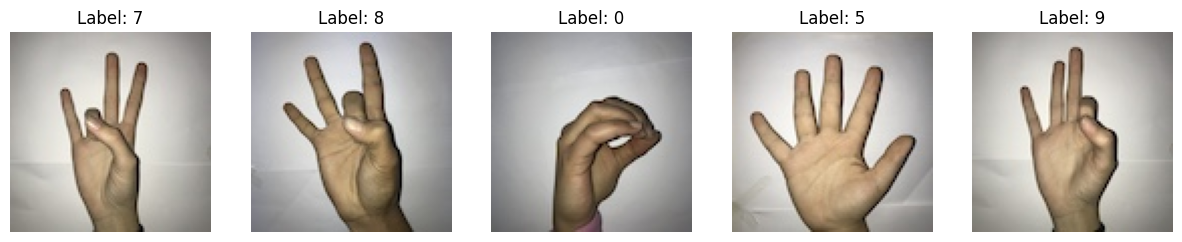

In [22]:
def load_images_and_labels(base_dir):
    image_arrays = []
    labels = []

    # Iterate through each folder
    for folder in os.listdir(base_dir):
        folder_path = os.path.join(base_dir, folder)
        if os.path.isdir(folder_path):
            # Iterate through each image in the folder
            for img_file in os.listdir(folder_path):
                if img_file.endswith('.JPG'):
                    img_path = os.path.join(folder_path, img_file)
                    img = Image.open(img_path)
                    img_array = np.array(img)  # Convert image to numpy array
                    image_arrays.append(img_array)
                    labels.append(int(folder))  # Folder name is the label

    return np.array(image_arrays), np.array(labels)  # Convert lists to numpy arrays

def display_sample_images(images, labels, num_samples=5):
    plt.figure(figsize=(15, 3))

    sample_indices = random.sample(range(len(images)), num_samples)
    for i, index in enumerate(sample_indices):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(images[index], cmap='gray')
        plt.title(f"Label: {labels[index]}")
        plt.axis('off')

    plt.show()

# Path to the dataset directory
base_dir = "/content/drive/MyDrive/10719/MLMF/SLD/Sign-Language-Digits-Dataset/Dataset"

# Load images and labels
sign_images, sign_labels = load_images_and_labels(base_dir)
# Display a few sample images with labels
display_sample_images(sign_images, sign_labels, num_samples=5)

In [23]:
cd ../..

/content/drive/.shortcut-targets-by-id/13HjIT2e4M8H7y9Xxc3kOfNClfPafIoWN/10719


/

Opening dataset in read-only mode as you don't have write permissions.


/

This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/spoken_mnist



/

hub://activeloop/spoken_mnist loaded successfully.



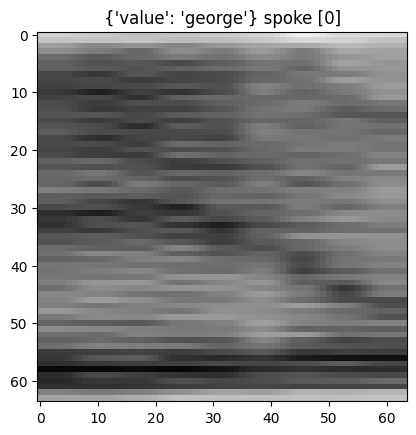

In [24]:
ds = hub.load("hub://activeloop/spoken_mnist")

# check out the first spectrogram, it's label, and who spoke it!
plt.imshow(ds.spectrograms[0].numpy())
plt.title(f"{ds.speakers[0].data()} spoke {ds.labels[0].numpy()}")
plt.show()

In [25]:
ds

Dataset(path='hub://activeloop/spoken_mnist', read_only=True, tensors=['spectrograms', 'labels', 'audio', 'speakers'])

In [26]:
ds.speakers.numpy().shape

(3000, 1)

In [27]:
np.unique(ds.speakers)

array(['george', 'jackson', 'lucas', 'nicolas', 'theo', 'yweweler'],
      dtype='<U8')

In [28]:
ds.spectrograms.numpy().shape

(3000, 64, 64, 4)

In [29]:
ds.labels.numpy().shape

(3000, 1)

In [30]:
ds.labels.numpy()[2999]

array([9], dtype=uint32)

In [31]:
np.unique(ds.labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint32)

In [32]:
def load_fsdd_spectrograms(ds):
    # Load your FSDD spectrogram data here
    return ds.spectrograms.numpy(), ds.labels.numpy()

In [33]:
# Load MNIST data
mnist_transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
mnist_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=mnist_transform)
mnist_loader = DataLoader(mnist_dataset, batch_size=len(mnist_dataset))
mnist_data, mnist_labels = next(iter(mnist_loader))
mnist_data = mnist_data[:, 0, :, :]  # Convert to grayscale

In [34]:
mnist_labels.shape

torch.Size([60000])

In [35]:
mnist_data.shape

torch.Size([60000, 28, 28])

In [36]:
# Load FSDD data
fsdd_spectrograms, fsdd_labels = load_fsdd_spectrograms(ds)

In [37]:
fsdd_labels.shape

(3000, 1)

In [38]:
fsdd_spectrograms.shape

(3000, 64, 64, 4)

In [39]:
mnist_data.shape

torch.Size([60000, 28, 28])

In [40]:
# # Load SLD Data
# X = np.load('SLD/X.npy')
# Y = np.load('SLD/Y.npy')
# print(X.shape, Y.shape)

In [41]:
# Match MNIST images with FSDD labels
# combined_images = mnist_data[fsdd_labels.argsort()]

# Ensure fsdd_labels are in the same range as mnist_labels
assert fsdd_labels.min() >= 0 and fsdd_labels.max() <= 9, "FSDD labels are out of range"

# Function to match MNIST images with FSDD labels
def match_mnist_images_with_fsdd_labels(mnist_images, mnist_labels, fsdd_labels):
    matched_images = []
    for label in fsdd_labels:
        # Find all indices of MNIST images with the current label
        indices = np.where(mnist_labels.numpy() == label)[0]
        if len(indices) == 0:
            raise ValueError(f"No matching MNIST image found for label {label}")
        # Randomly select one index
        selected_index = random.choice(indices)
        # Append the corresponding MNIST image
        matched_images.append(mnist_images[selected_index])
    return torch.stack(matched_images)

# Match MNIST images with FSDD labels
combined_images = match_mnist_images_with_fsdd_labels(mnist_data, mnist_labels, fsdd_labels)

# Check the shape of the combined images
print("Shape of combined images:", combined_images.shape)

Shape of combined images: torch.Size([3000, 28, 28])


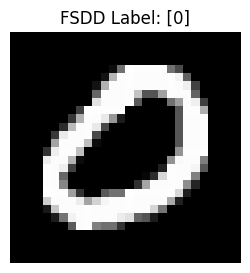

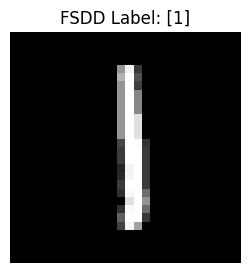

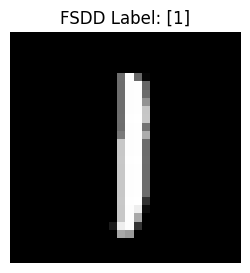

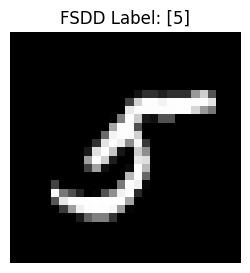

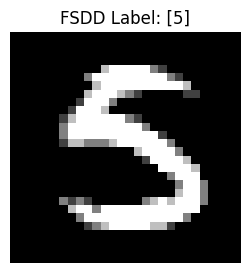

In [42]:
# Visualize random pairs of MNIST images and FSDD labels
num_pairs_to_visualize = 5  # You can adjust this number as needed

for _ in range(num_pairs_to_visualize):
    # Randomly select an index
    index = random.randint(0, len(fsdd_labels) - 1)
    fsdd_label = fsdd_labels[index]

    # Retrieve the corresponding MNIST image
    image = combined_images[index].squeeze()

    # Display the MNIST image and its corresponding FSDD label
    plt.figure(figsize=(3, 3))
    plt.imshow(image, cmap='gray')
    plt.title(f"FSDD Label: {fsdd_label}")
    plt.axis('off')
    plt.show()

In [43]:
combined_images[0].shape

torch.Size([28, 28])

In [44]:
# fsdd_spectrograms = fsdd_spectrograms.reshape(-1, 1, 64, 64)

In [45]:
combined_images.shape

torch.Size([3000, 28, 28])

In [46]:
# combined_images = combined_images.unsqueeze(1)
combined_images.shape

torch.Size([3000, 28, 28])

In [47]:
fsdd_spectrograms.shape

(3000, 64, 64, 4)

In [48]:
fsdd_labels.shape

(3000, 1)

In [49]:
sign_images[-1].shape

(100, 100, 3)

In [50]:
standard_shape = (100, 100, 3)  # Define the standard shape

# Resize images if they don't match the standard shape
standardized_images = []
for img in sign_images:
    if img.shape != standard_shape:
        # Resize and append
        img_pil = Image.fromarray(img)
        img_resized = img_pil.resize(standard_shape[:2])  # Resize ignores the channel dimension
        standardized_images.append(np.array(img_resized))
    else:
        standardized_images.append(img)

# Now try stacking
stacked_images = np.stack(standardized_images, axis=0)
print("Stacked array shape:", stacked_images.shape)

Stacked array shape: (2062, 100, 100, 3)


In [51]:
sld_sign = torch.tensor(stacked_images)
sld_sign_label = torch.tensor(sign_labels)
print(sld_sign.shape, sld_sign_label.shape)

# Convert fsdd_labels to a tensor
fsdd_labels_tensor = torch.tensor(fsdd_labels.astype(np.int64)).squeeze()

# Convert one-hot encoded sld_sign to class labels
# sld_class_labels = torch.argmax(torch.tensor(sld_sign_label), dim=1)

print(fsdd_labels_tensor.shape, sld_sign_label.shape)

torch.Size([2062, 100, 100, 3]) torch.Size([2062])
torch.Size([3000]) torch.Size([2062])


In [52]:
fsdd_labels_tensor.unique(), sld_sign_label.unique()

(tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))

In [53]:
common_indices = [torch.where(fsdd_labels_tensor == label.item())[0][0] for label in sld_sign_label] #  finding the first occurrence of the label in fsdd_labels_tensor
print(len(common_indices))
filtered_combined_images = combined_images[common_indices]
filtered_fsdd_spectrograms = fsdd_spectrograms[common_indices]

2062


In [54]:
filtered_combined_images.shape

torch.Size([2062, 28, 28])

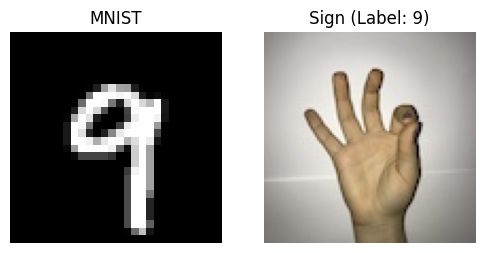

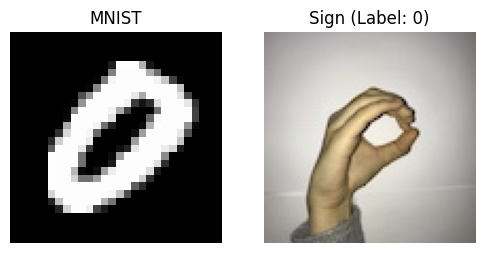

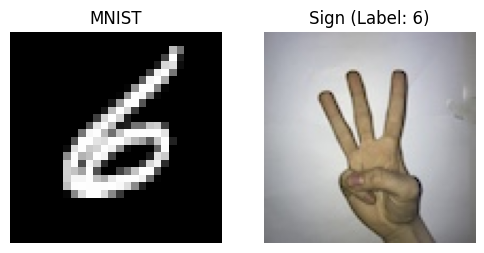

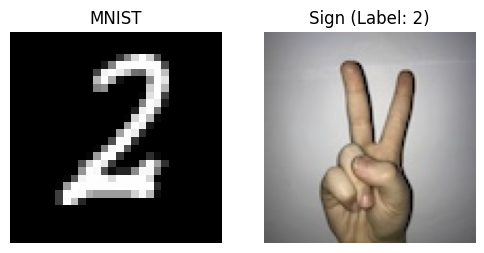

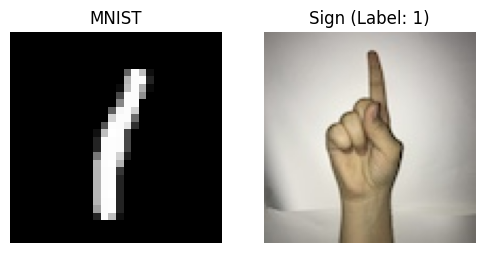

In [55]:
# Visualize random pairs of MNIST images and FSDD labels
num_pairs_to_visualize = 5  # You can adjust this number as needed

for _ in range(num_pairs_to_visualize):
    # Randomly select an index
    index = random.randint(0, len(sld_sign_label) - 1)
    sld_label = sld_sign_label[index].item()
    # fsdd_label = fsdd_labels[index]

    # Retrieve the corresponding MNIST image and sign
    image = filtered_combined_images[index].squeeze()
    sign = sld_sign[index].squeeze()

    # Create a figure with 2 subplots
    plt.figure(figsize=(6, 3))  # Adjust the figure size as needed

    # Subplot for the MNIST image
    plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
    plt.imshow(image, cmap='gray')
    # plt.title(f"FSDD Label: {fsdd_label}")
    plt.title(f"MNIST")
    plt.axis('off')

    # Subplot for the sign
    plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
    plt.imshow(sign, cmap='gray')
    plt.title(f"Sign (Label: {sld_label})")
    plt.axis('off')

    plt.show()


In [56]:
def process_images_pytorch(images, new_size=(28, 28)):
    processed_images = []

    # Define the transforms
    transform = transforms.Compose([
        transforms.ToPILImage(),           # Convert to PIL Image for resizing
        transforms.Resize(new_size),       # Resize
        transforms.Grayscale(),            # Convert to grayscale
        transforms.ToTensor()              # Convert back to tensor
    ])

    for img in images:
        # Apply the transforms
        img_tensor = transform(img)
        # Remove the channel dimension since it's grayscale
        img_tensor = img_tensor.squeeze(0)

        processed_images.append(img_tensor.numpy())

    return np.array(processed_images)

sld_sign = process_images_pytorch(sign_images)
print("Processed array shape:", sld_sign.shape)  # Should be (2602, 28, 28)

Processed array shape: (2062, 28, 28)


In [57]:
def process_images_pytorch(images, new_size=(28, 28)):
    processed_images = []

    # Define the transforms
    transform = transforms.Compose([
        transforms.ToPILImage(),           # Convert to PIL Image for resizing
        transforms.Resize(new_size),       # Resize
        transforms.Grayscale(),            # Convert to grayscale
        transforms.ToTensor()              # Convert back to tensor
    ])

    for img in images:
        # Apply the transforms
        img_tensor = transform(img)
        # Remove the channel dimension since it's grayscale
        img_tensor = img_tensor.squeeze(0)

        processed_images.append(img_tensor.numpy())

    return np.array(processed_images)

sld_sign = process_images_pytorch(sign_images)
print("Processed array shape:", sld_sign.shape)  # Should be (2602, 28, 28)

Processed array shape: (2062, 28, 28)


In [58]:
sld_sign.shape

(2062, 28, 28)

In [59]:
filtered_combined_images.shape

torch.Size([2062, 28, 28])

## **B2.0 Multi-Modal**

In [ ]:
class MyDataset(Dataset):
    def __init__(self, images, specs, labels, transform=None):
        self.images = images
        self.specs = specs
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = self.images[idx]
        spec =  self.specs[idx]
        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)

        return image, spec, label

class MultiModalDataset(Dataset):
    def __init__(self, images, spectrograms, signs, labels):
        self.images = images
        self.spectrograms = spectrograms
        self.signs = signs
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        image = self.images[idx]
        spectrogram = self.spectrograms[idx]
        sign = self.signs[idx]
        label = self.labels[idx]
        return image, spectrogram, sign, label


In [ ]:
############################### FOR 3 MODALITIES ######################################
# Join dataset
# joint_dataset = MultiModalDataset(filtered_combined_images, filtered_fsdd_spectrograms, sld_sign, sld_class_labels)

# Split your dataset into training and validation sets (25% for validation)
total_samples = len(filtered_combined_images)
# val_samples = int(0.25 * total_samples)
val_samples = int(0.20 * total_samples) # 30% for validation
# dev_samples = int(0.30 * total_samples) # 30% for dev validation
train_samples = total_samples - val_samples

# Convert torch tensors to numpy arrays for easier splitting
# filtered_combined_images = filtered_combined_images.numpy().astype(np.float32)

train_dataset, val_dataset = random_split(
    MultiModalDataset(filtered_combined_images, filtered_fsdd_spectrograms, sld_sign, sld_sign_label), # 2062
    [train_samples, val_samples]
)

# Define batch size
batch_size = 16

# Create data loaders for training and validation
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
# dev_loader = DataLoader(dev_dataset, batch_size=batch_size)

# Check the number of samples in each split
print(f"Number of samples in training set 3 modalities: {len(train_loader.dataset)}")
print(f"Number of samples in validation set 3 modalities: {len(val_loader.dataset)}")
# print(f"Number of samples in dev set 3 modalities: {len(dev_loader.dataset)}")
#######################################################################################

Number of samples in training set 3 modalities: 1650
Number of samples in validation set 3 modalities: 412


In [ ]:
# class SimpleResNet(nn.Module):
#     def __init__(self):
#         super(SimpleResNet, self).__init__()
#         # Image branch (using ResNet's initial layers)
#         self.image_branch = models.resnet18(pretrained=False)
#         self.image_branch.conv1 = nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
#         self.image_branch.fc = nn.Identity()  # Remove final fully connected layer

#         # Spectrogram branch (similar to image branch)
#         self.spectrogram_branch = models.resnet18(pretrained=False)
#         self.spectrogram_branch.conv1 = nn.Conv2d(4, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
#         self.spectrogram_branch.fc = nn.Identity()  # Remove final fully connected layer

#         # Final fully connected layers
#         self.fc1 = nn.Linear(512 * 2, 128)  # Adjusted for the combination of both branches
#         self.fc2 = nn.Linear(128, 10)       # Output layer for 10 classes

#     def forward(self, x_img, x_sp, modality='both'):
#         if x_img.shape[1] != 1:
#             raise ValueError(f"Expected image data with 1 channel, but got {x_img.shape[1]} channels.")

#         # Apply masking logic
#         if modality == 'image':
#             x_sp = torch.zeros_like(x_sp)
#         elif modality == 'spectrogram':
#             x_img = torch.zeros_like(x_img)

#         # Image branch torch.Size([64, 512])
#         img_out = self.image_branch(x_img) if modality in ['image', 'both'] else torch.zeros(x_img.size(0), 512).to(device)

#         # Spectrogram branch torch.Size([64, 512])
#         sp_out = self.spectrogram_branch(x_sp.permute(0, 3, 1, 2).to(torch.float32)) if modality in ['spectrogram', 'both'] else torch.zeros(x_sp.size(0), 512).to(device)

#         # Combine both branches
#         combined = torch.cat((img_out, sp_out), dim=1)

#         # Final fully connected layers
#         x = F.relu(self.fc1(combined))
#         x = self.fc2(x)
#         return x

# # Initialize the model
# model = SimpleResNet()

In [ ]:
# seed = 42
# torch.manual_seed(seed)
# np.random.seed(seed)
# random.seed(seed)
# if torch.cuda.is_available():
#     torch.cuda.manual_seed_all(seed)

# Move model to device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model.to(device)

# # Loss function and optimizer
# criterion = nn.CrossEntropyLoss()
# optimizer = optim.Adam(model.parameters(), lr=0.001)

# # Number of epochs
# epoch = 20

In [ ]:
class LayerWithNames(nn.Module):
    def __init__(self, layers):
        super(LayerWithNames, self).__init__()
        for name, layer in layers:
            self.add_module(name, layer)
    def forward(self, x):
        # Define the forward pass through each layer in the module
        for layer_name, layer in self._modules.items():
            x = layer(x)
        return x

class MultiModalNet(torch.nn.Module):
    def __init__(self):
        super(MultiModalNet, self).__init__()

        #   Worked
        # Image branch
        image_branch_layers = [
            ('conv1', nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)),
            ('relu1', nn.ReLU()),
            ('maxpool1', nn.MaxPool2d(kernel_size=2, stride=2)),
            ('conv2', nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)),
            ('relu2', nn.ReLU()),
            ('maxpool2', nn.MaxPool2d(kernel_size=2, stride=2))
        ]
        self.image_branch = LayerWithNames(image_branch_layers)

        # Spectrogram branch
        spectrogram_branch_layers = [
            ('conv1', nn.Conv2d(4, 32, kernel_size=3, stride=1, padding=1)),
            ('relu1', nn.ReLU()),
            ('maxpool1', nn.MaxPool2d(kernel_size=2, stride=2)),
            ('conv2', nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)),
            ('relu2', nn.ReLU()),
            ('maxpool2', nn.MaxPool2d(kernel_size=2, stride=2)),
            ('conv3', nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1)),
            ('relu3', nn.ReLU()),
            ('maxpool3', nn.MaxPool2d(kernel_size=2, stride=2)),
            ('conv4', nn.Conv2d(64, 64, kernel_size=2, stride=1))
        ]
        self.spectrogram_branch = LayerWithNames(spectrogram_branch_layers)

        # Sign branch
        sign_branch_layers = [
            ('conv1', nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)),
            ('relu1', nn.ReLU()),
            ('maxpool1', nn.MaxPool2d(kernel_size=2, stride=2)),
            ('conv2', nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)),
            ('relu2', nn.ReLU()),
            ('maxpool2', nn.MaxPool2d(kernel_size=2, stride=2))
        ]
        self.sign_branch = LayerWithNames(sign_branch_layers)

        # Initialize the fully connected layer with the maximum size
        self.fc1_max_size = 64 * 7 * 7 * 3  # when all three modalities are present
        # Final fully connected layers
        self.fc1 = nn.Linear(self.fc1_max_size, 128)  # if there's only 1 modality should be 64 * 7 * 7, 2 modality: 64 * 7 * 7 *2, 3 modality: 64 * 7 * 7*3
        self.fc2 = nn.Linear(128, 10)  # Output layer for 10 classes

        # Layer Track
        self.track_layers = {**dict(self.image_branch._modules), **dict(self.spectrogram_branch._modules), **dict(self.sign_branch._modules)}
        self.track_layers['fc1'] = self.fc1
        self.track_layers['fc2'] = self.fc2

    def forward(self, x_img=None, x_sp=None, x_sign=None, modalities=('image', 'spectrogram', 'sign')):
        outputs = []

        # print("x_img size:", x_img.size())
        # print("x_sp size:", x_sp.size())
        # print("x_sign size:", x_sign.size())
        #active_modalities = 0
        # import pdb;pdb.set_trace()
        if 'image' in modalities and x_img is not None:
            x_img = x_img.unsqueeze(1)
            img_out = self.image_branch(x_img)
            #active_modalities += 1
        else:
            img_out = torch.zeros(x_img.size(0), 512).to(device)
        outputs.append(img_out)

        if 'spectrogram' in modalities and x_sp is not None:
            sp_out = self.spectrogram_branch(x_sp.permute(0, 3, 1, 2).to(torch.float32))
            #active_modalities += 1
        else:
            sp_out = torch.zeros(x_sp.size(0), 512).to(device)
        outputs.append(sp_out)

        if 'sign' in modalities and x_sign is not None:
            # x_sign_resized = self.resize_transform(x_sign)
            x_sign = x_sign.unsqueeze(1)
            sign_out = self.sign_branch(x_sign)  # Add channel dimension
            #active_modalities += 1
            # import pdb;pdb.set_trace()
            # sign_out = self.sign_branch(x_sign)
        else:
            sign_out = torch.zeros(x_sign.size(0), 512).to(device)
        outputs.append(sign_out)

        # # Print output sizes after each branch
        # print("img_out size:", img_out.size())
        # print("sp_out size:", sp_out.size())
        # print("sign_out size:", sign_out.size())

        # Flatten and combine
        # Flatten the outputs from each branch
        img_out_flat = img_out.reshape(img_out.size(0), -1)  # Reshape to [64, 64*7*7]
        sp_out_flat = sp_out.reshape(sp_out.size(0), -1)    # Reshape to [64, 64*7*7]
        sign_out_flat = sign_out.reshape(sign_out.size(0), -1)  # Reshape to [64, 64*7*7]

        #  # Print output sizes after each branch
        # print("img_out_flat size:", img_out_flat.size())
        # print("sp_out_flat size:", sp_out_flat.size())
        # print("sign_out_flat size:", sign_out_flat.size())

        # Concatenate the flattened outputs
        combined = torch.cat((img_out_flat, sp_out_flat, sign_out_flat), dim=1)  # Shape: [64, 64*7*7*3]
        # # Debugging: Print the size of the combined tensor
        # print("Combined size:", combined.size()) # [16,4160]

        # Get the size of the combined tensor's feature dimension
        combined_size = combined.size(1)  # This gets the number of features

        # Use only the relevant part of self.fc1
        fc1_weight = self.fc1.weight[:, :combined_size]
        fc1_bias = self.fc1.bias
        x = F.relu(F.linear(combined, fc1_weight, fc1_bias))
        x = self.fc2(x)
        return x

    def get_track_layers(self):
        return self.track_layers

# Initialize the model
model3 = MultiModalNet().to(device)
# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model3.parameters(), lr=0.01)

# Number of epochs
epoch = 25
#######################################################################################

In [ ]:
############################### FOR 3 MODALITIES ######################################
def train3(model, device, train_loader, optimizer, criterion, epochs, modalities=('image', 'spectrogram', 'sign'),session=(0,0)):
    model.train()
    with open(f"/content/drive/MyDrive/10719/MLMF/results/multi-modal/train/train_log_session_{session[0]}_{session[1]}.txt", 'w') as f:
      for epoch in range(1, epochs + 1):
          total_loss = 0.0
          correct = 0
          for batch_idx, (data_img, data_sp, data_sign, target) in enumerate(train_loader):
              data_img, data_sp, data_sign, target = data_img.to(device), data_sp.to(device), data_sign.to(device), target.to(device)

              optimizer.zero_grad()
              output = model(data_img, data_sp, data_sign, modalities)
              loss = criterion(output, target.squeeze())

              loss.backward()
              optimizer.step()

              total_loss += loss.item()
              pred = output.argmax(dim=1, keepdim=True)
              correct += pred.eq(target.view_as(pred)).sum().item()
          avg_loss = total_loss / len(train_loader)
          train_accuracy = 100. * correct / len(train_loader.dataset)
          f.write(f'{epoch}\t{avg_loss:.6f}\t{train_accuracy:.6f}\n')
          #print(f'Train Epoch: {epoch}\tAverage Loss: {avg_loss:.6f}')


def test3(model, device, test_loader, criterion, modalities=('image', 'spectrogram', 'sign'),session=(0,0)):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data_img, data_sp, data_sign, target in test_loader:
            data_img, data_sp, data_sign, target = data_img.to(device), data_sp.to(device), data_sign.to(device), target.to(device)

            output = model(data_img, data_sp, data_sign, modalities)
            test_loss += criterion(output, target).item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    # with open(f"/content/drive/MyDrive/10719/MLMF/results/multi-modal/test/test_log_session_{session[0]}_{session[1]}.txt", 'w') as f:
    test_loss /= len(test_loader.dataset)
    test_accuracy = 100. * correct / len(test_loader.dataset)
    print(f'{epoch}: test_loss: {test_loss:.6f}, test_acc: {test_accuracy:.6f}\n')
      # f.write(f'{epoch}\t{test_loss:.6f}\n')

    return test_accuracy
#######################################################################################

##### **plot the testing convergence**

In [ ]:
import matplotlib.pyplot as plt

def plot_loss(training_or_testing="train"):

    misssing_modality_list = ['image','spectrogram','sign','image/spectrogram','image/sign','spectrogram/sign','image/sign/spectrogram']
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))  # Adjust the size as needed
    fig.suptitle(f'{training_or_testing} Loss for Different Sessions')

    # Adjust the loop to match your file naming convention
    for i in range(7):
      row = i // 3  # Integer division to find the row
      col = i % 3   # Modulus to find the column
      session_index = i
      log_file = f"/content/drive/MyDrive/10719/MLMF/results/multi-modal/{training_or_testing}/{training_or_testing}_log_session_0_{session_index}.txt"
      epochs, losses, accuracy_list = [], [], []
      with open(log_file, 'r') as f:
          for line in f:
              epoch, loss, accuracy = line.strip().split('\t')
              epochs.append(int(epoch))
              losses.append(float(loss))
              accuracy_list.append(float(accuracy))

      ax = axes[row, col]
      ax.plot(epochs, losses, marker='o')
      ax.set_title(misssing_modality_list[session_index])
      ax.set_xlabel('Epoch')
      ax.set_ylabel('Loss')
      ax.grid(True)

    # Hide the empty subplots
    for i in range(7, 9):
        fig.delaxes(axes.flatten()[i])

    plt.tight_layout()
    plt.savefig(f"/content/drive/MyDrive/10719/MLMF/results/multi-modal/{training_or_testing}/loss.jpg")
    plt.show()

def plot_accuracy(training_or_testing="train"):
    misssing_modality_list = ['image', 'spectrogram', 'sign', 'image/spectrogram', 'image/sign', 'spectrogram/sign', 'image/sign/spectrogram']
    fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 20))  # Adjust the size as needed
    fig.suptitle(f'{training_or_testing} Accuracy for Different Sessions')

    for session_index in range(7):
        row = session_index // 2  # Integer division to find the row
        col = session_index % 2   # Modulus to find the column
        log_file = f"/content/drive/MyDrive/10719/MLMF/results/multi-modal/{training_or_testing}/{training_or_testing}_log_session_0_{session_index}.txt"
        epochs, losses, accuracy_list = [], [], []
        with open(log_file, 'r') as f:
            for line in f:
                epoch, loss, accuracy = line.strip().split('\t')
                epochs.append(int(epoch))
                losses.append(float(loss))
                accuracy_list.append(float(accuracy))

        ax = axes[row, col]
        ax.plot(epochs, accuracy_list, marker='o')
        ax.set_title(misssing_modality_list[session_index])
        ax.set_xlabel('Epoch')
        ax.set_ylabel('Accuracy')
        ax.grid(True)

    # Hide the last empty subplot
    fig.delaxes(axes.flatten()[7])

    plt.tight_layout()
    plt.savefig(f"/content/drive/MyDrive/10719/MLMF/results/multi-modal/{training_or_testing}/accuracy.jpg")
    plt.show()

In [ ]:
!pip install tqdm >/dev/null

Training modalities progress:  14%|█▍        | 1/7 [00:09<00:55,  9.25s/it]

25: test_loss: 0.000000, test_acc: 100.000000




Training modalities progress:  29%|██▊       | 2/7 [00:21<00:56, 11.21s/it]

25: test_loss: 0.308774, test_acc: 8.495146




Training modalities progress:  43%|████▎     | 3/7 [00:32<00:43, 10.85s/it]

25: test_loss: 2.472161, test_acc: 13.349515




Training modalities progress:  57%|█████▋    | 4/7 [00:46<00:36, 12.19s/it]

25: test_loss: 0.000000, test_acc: 100.000000




Training modalities progress:  71%|███████▏  | 5/7 [00:57<00:23, 11.92s/it]

25: test_loss: 7.057515, test_acc: 23.058252




Training modalities progress:  86%|████████▌ | 6/7 [01:12<00:12, 12.85s/it]

25: test_loss: 0.369929, test_acc: 20.631068




Testing modalities progress: 100%|██████████| 1/1 [01:27<00:00, 87.93s/it]

25: test_loss: 0.000000, test_acc: 100.000000

acc for each combination is: [[100.           8.49514563  13.34951456 100.          23.05825243
   20.63106796 100.        ]]


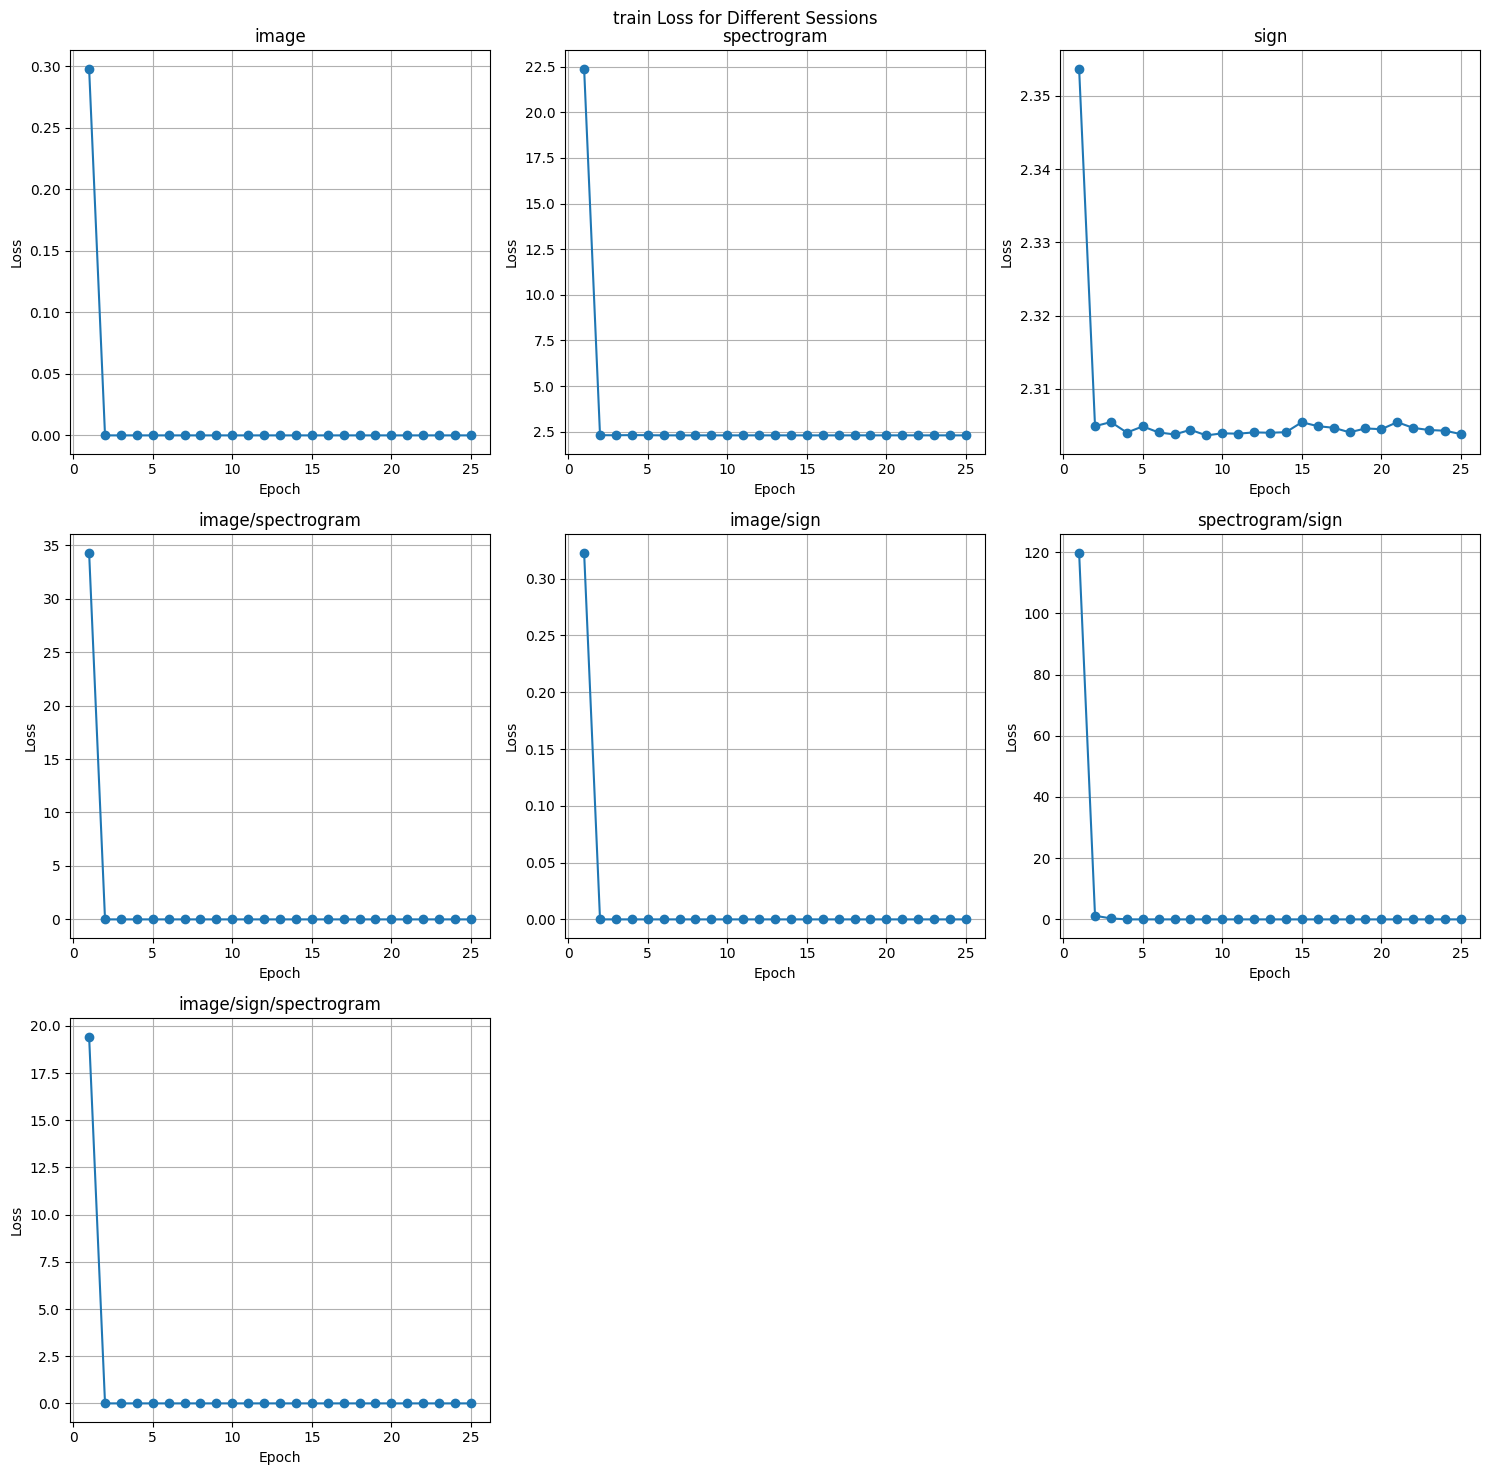

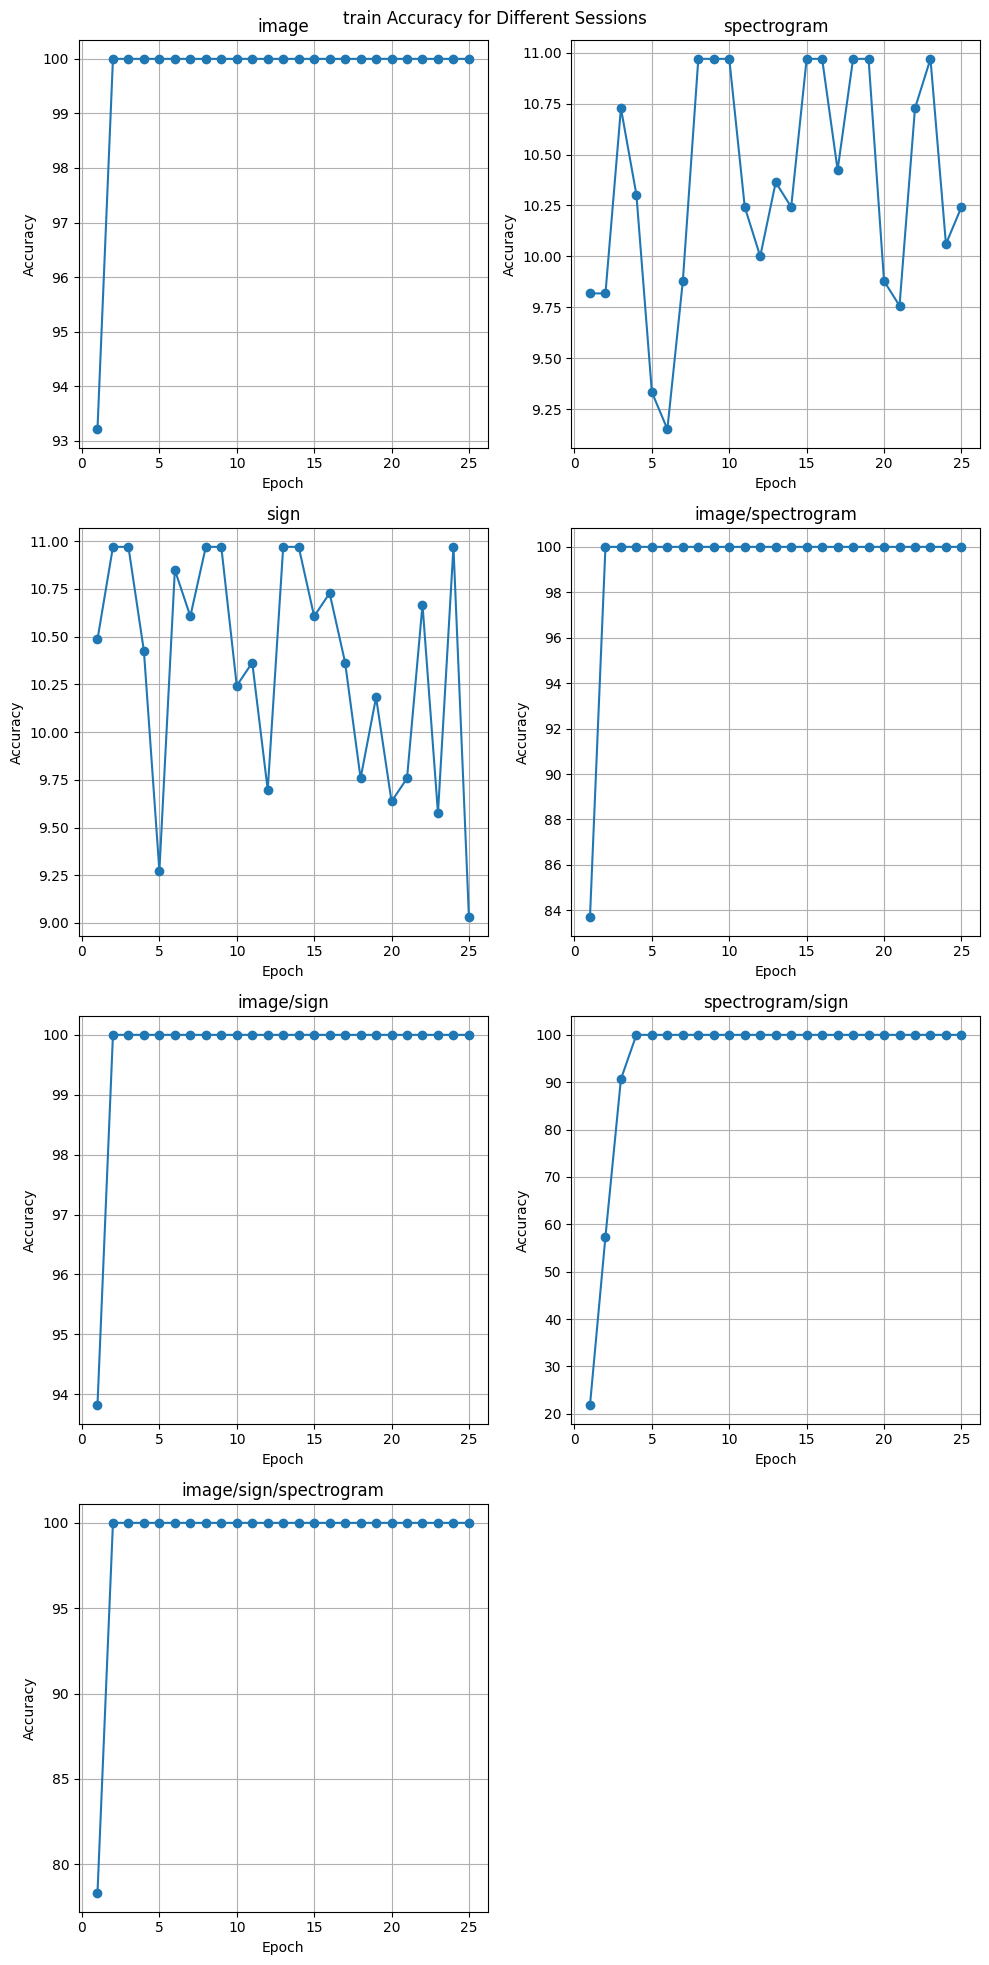

In [ ]:

"""
example: train the model on these 2 modalities: ('image','spectrogram').
The model parameter will be trained to learn from these 2 modalities.
We want to test if these parameters also have the knowledge to fit the third modalitiy (given that the labels for all modalities are the same)
so one testing case is to test on full modality ('image', 'spectrogram','sign')
"""
full_modality_list = [('image', 'spectrogram','sign')]
misssing_modality_list = [('image'),('spectrogram'),('sign'),('image','spectrogram'),('image','sign'),('spectrogram','sign'),('image','sign','spectrogram')]


acc_matrix = np.zeros((1,7))
for j,test_modalities in enumerate(tqdm(full_modality_list, desc="Testing modalities progress")):
  for i,train_modalities in enumerate(tqdm(misssing_modality_list, desc="Training modalities progress")):
    model3 = MultiModalNet().to(device)
    optimizer = optim.Adam(model3.parameters(), lr=0.01)
    train3(model3, device, train_loader, optimizer, criterion, epoch, modalities=train_modalities,session=(j,i))
    test_acc = test3(model3, device, val_loader, criterion, modalities=test_modalities,session=(j,i))
    acc_matrix[j][i] = test_acc

print(f"acc for each combination is: {acc_matrix}")

plot_loss(training_or_testing = "train")
plot_accuracy(training_or_testing="train")

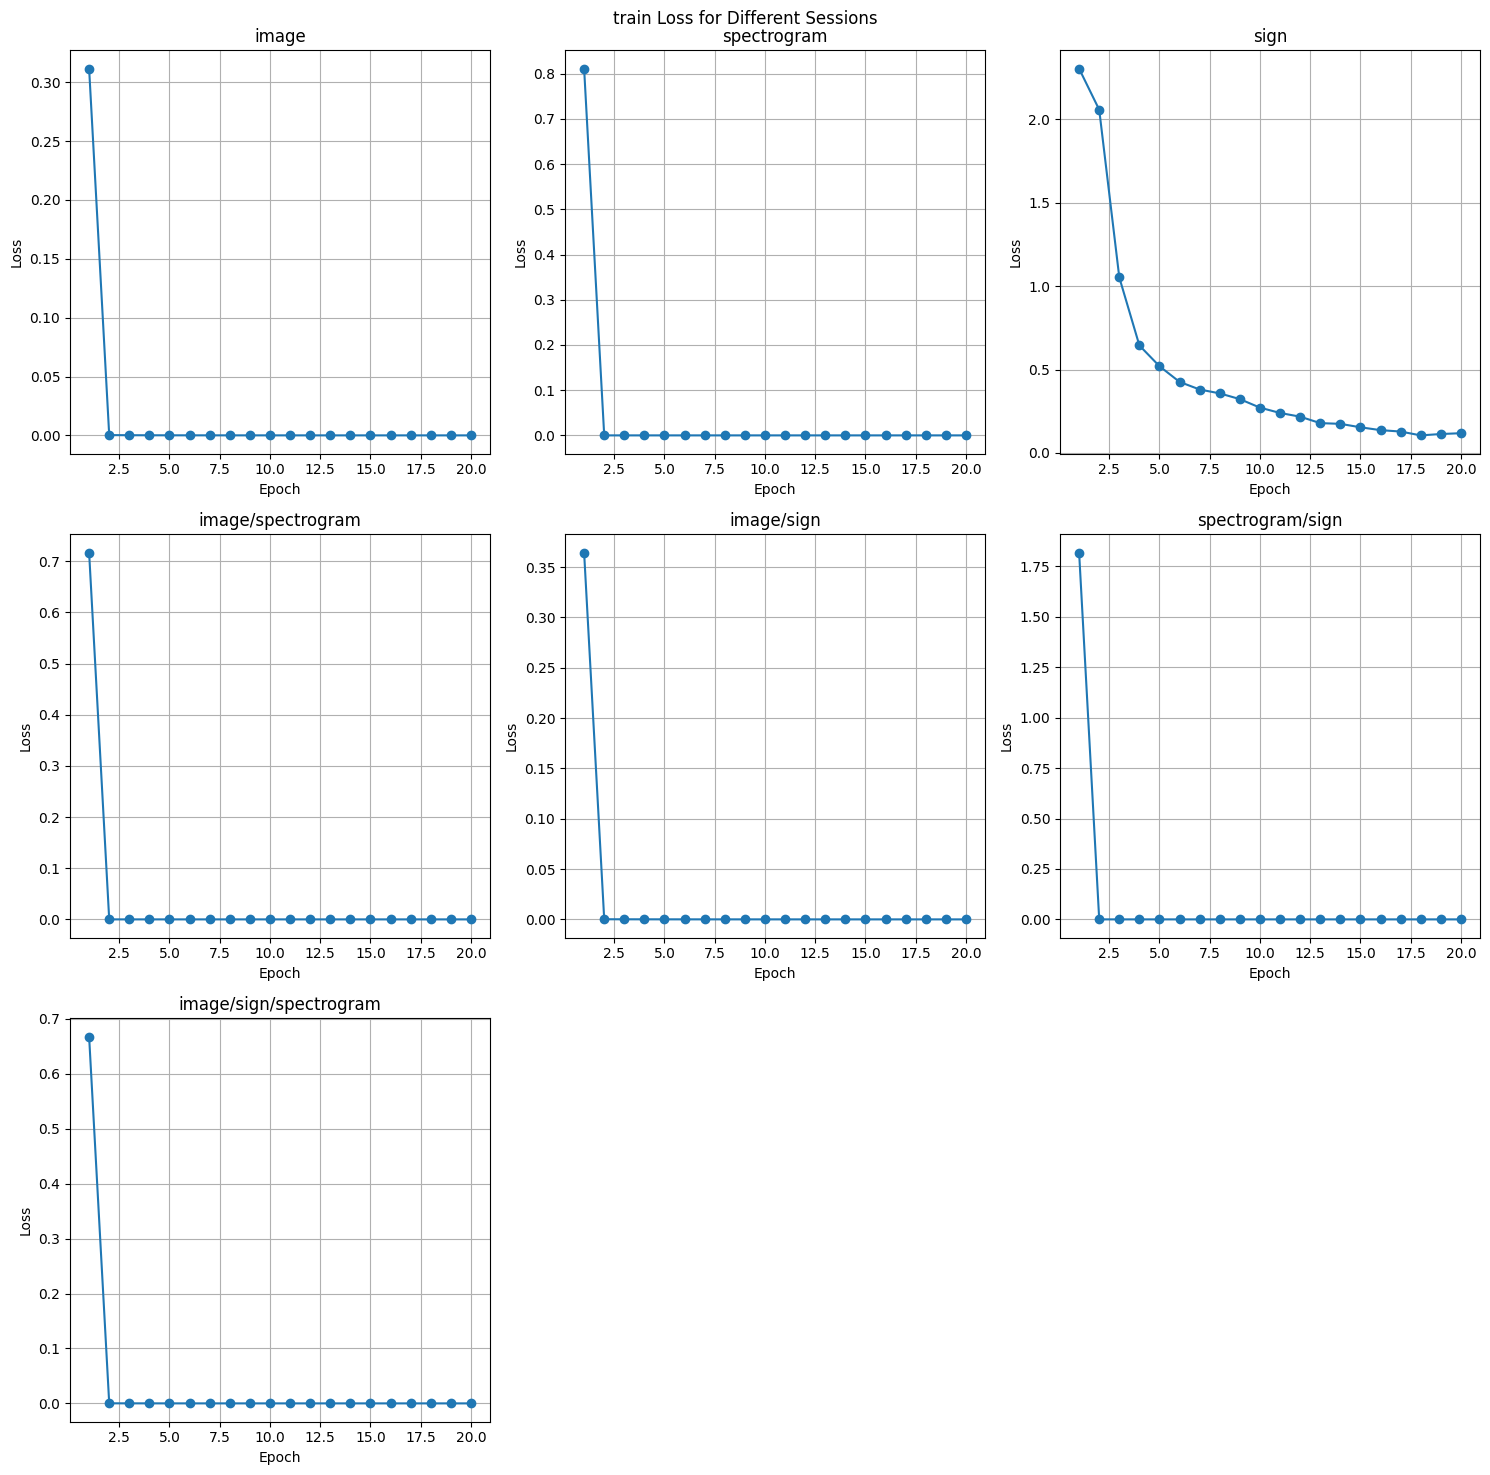

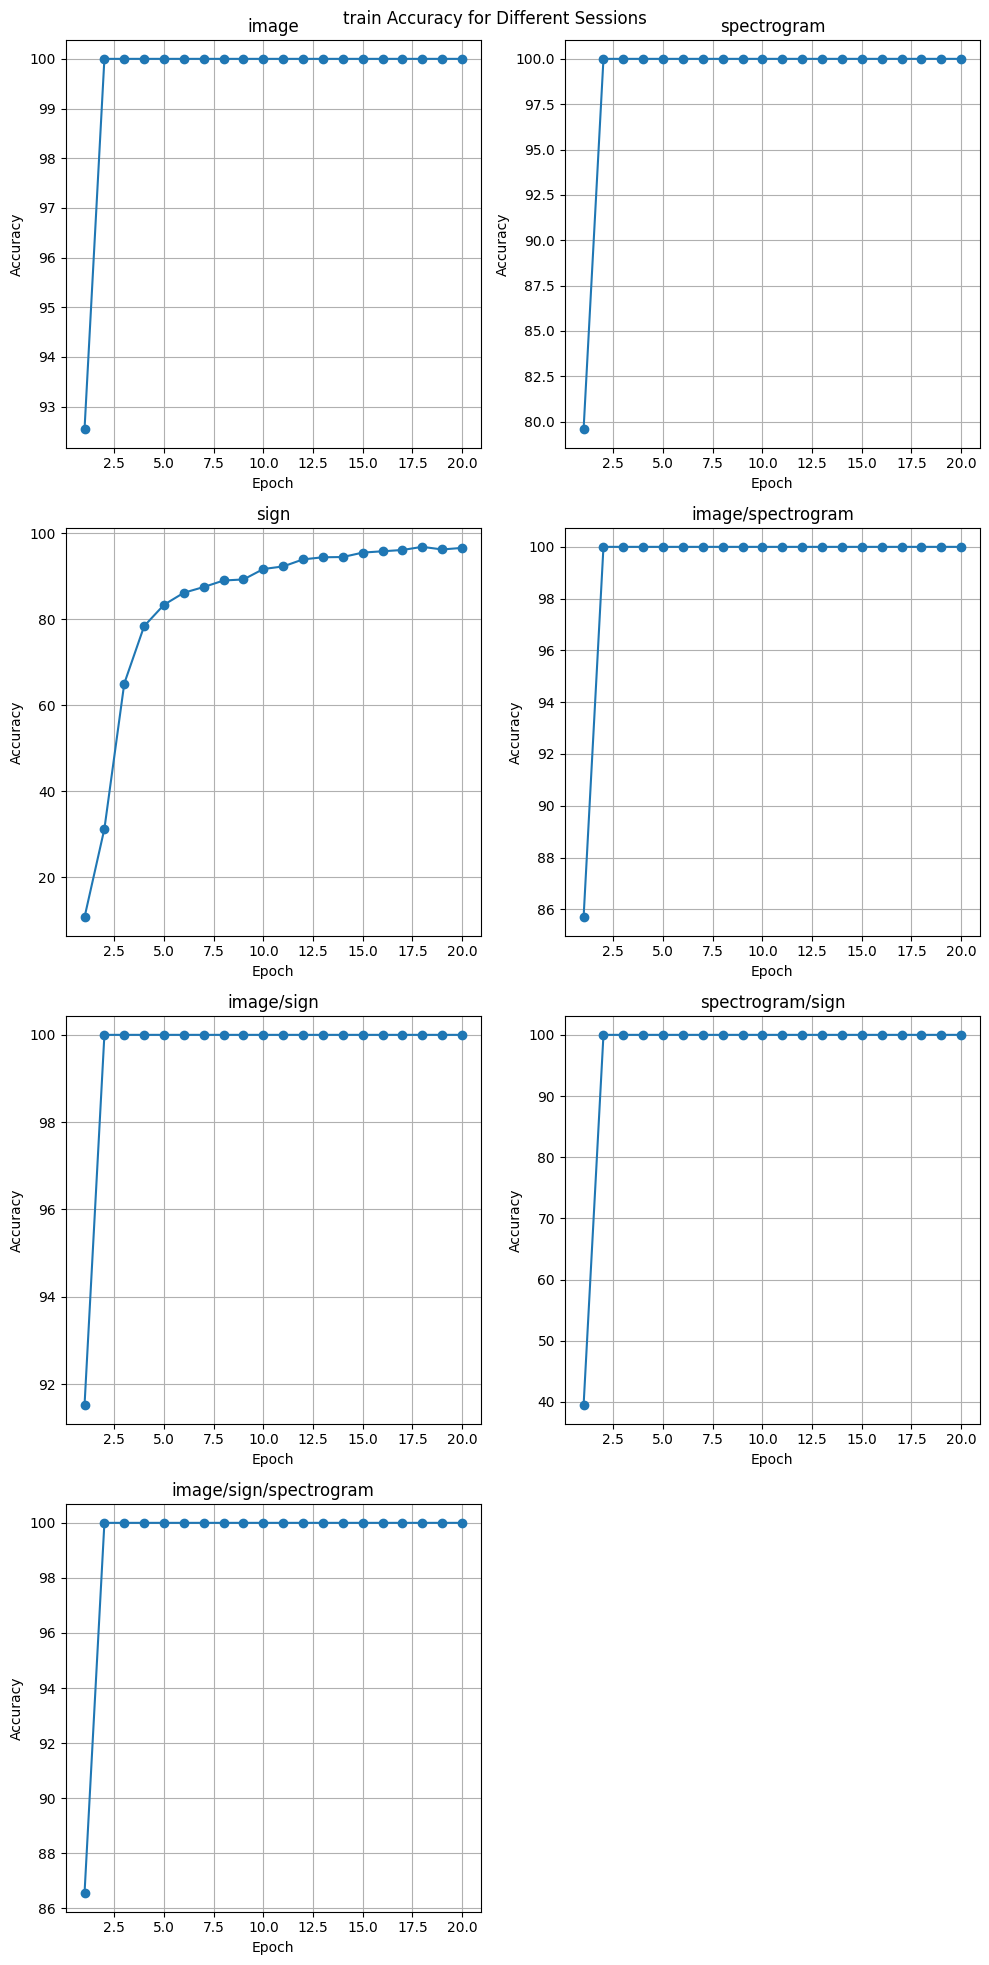

In [ ]:
plot_loss(training_or_testing = "train")
plot_accuracy(training_or_testing="train")

In [ ]:
# Ref https://www.kaggle.com/code/puru98/federated-learning-pytorch

## **B2.1 FL**

In [ ]:
# Federated Learning
num_clients = 2
rounds = 20
batch_size = 16
epochs_per_client = 5
learning_rate = 2e-2

In [ ]:
def get_device():
    return torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

def to_device(data, device):
    if isinstance(data, (list, tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

# wraps the DeviceDataLoader around a DataLoader, during iteration of DeviceDataLoader, it
# internally itereates over the batches provided by the original DataLoader (trainingset dataloader) and move the batch to device
class DeviceDataLoader(DataLoader):
        def __init__(self, dl, device):
            self.dl = dl
            self.device = device

        def __iter__(self):
            for batch in self.dl:
                yield to_device(batch, self.device)

        def __len__(self):
            return len(self.dl)

In [ ]:
# class FederatedNet(torch.nn.Module):
#     def __init__(self):
#         super(FederatedNet, self).__init__()
#         # super().__init__()
#         # Image branch (using ResNet's initial layers)
#         self.image_branch = models.resnet18(pretrained=False)
#         self.image_branch.conv1 = nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
#         self.image_branch.fc = nn.Identity()  # Remove final fully connected layer

#         # Spectrogram branch (similar to image branch)
#         self.spectrogram_branch = models.resnet18(pretrained=False)
#         self.spectrogram_branch.conv1 = nn.Conv2d(4, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
#         self.spectrogram_branch.fc = nn.Identity()  # Remove final fully connected layer

#         # Final fully connected layers
#         self.fc1 = nn.Linear(512 * 2, 128)  # Adjusted for the combination of both branches
#         self.fc2 = nn.Linear(128, 10)       # Output layer for 10 classes

#         # Layer Track
#         self.track_layers = {'image_branch': self.image_branch,
#                              'spectrogram_branch': self.spectrogram_branch,
#                              'image_branch.conv1': self.image_branch.conv1,
#                              'spectrogram_branch.conv1': self.spectrogram_branch.conv1,
#                              'image_branch.fc': self.image_branch.fc,
#                              'spectrogram_branch.fc': self.image_branch.fc,
#                              'fc1': self.fc1,
#                              'fc2': self.fc2}

#     def forward(self, x_img, x_sp, modality='both'):
#         if x_img.shape[1] != 1:
#             raise ValueError(f"Expected image data with 1 channel, but got {x_img.shape[1]} channels.")

#         # Apply masking logic
#         if modality == 'image':
#             x_sp = torch.zeros_like(x_sp)
#         elif modality == 'spectrogram':
#             x_img = torch.zeros_like(x_img)

#         # Image branch torch.Size([64, 512])
#         img_out = self.image_branch(x_img) if modality in ['image', 'both'] else torch.zeros(x_img.size(0), 512).to(device)

#         # Spectrogram branch torch.Size([64, 512])
#         # sp_out = self.spectrogram_branch(x_sp) if modality in ['spectrogram', 'both'] else torch.zeros(x_sp.size(0), 512).to(device)
#         # sp_out = self.spectrogram_branch(x_sp.permute(0, 3, 1, 2)) if modality in ['spectrogram', 'both'] else torch.zeros(x_sp.size(0), 512).to(device)
#         sp_out = self.spectrogram_branch(x_sp.permute(0, 3, 1, 2).to(torch.float32)) if modality in ['spectrogram', 'both'] else torch.zeros(x_sp.size(0), 512).to(device)

#         # import pdb;pdb.set_trace()
#         # Combine both branches
#         combined = torch.cat((img_out, sp_out), dim=1)

#         # Final fully connected layers
#         x = F.relu(self.fc1(combined))
#         x = self.fc2(x)
#         return x

#     def get_track_layers(self):
#         return self.track_layers

#     def apply_parameters(self, parameters_dict):
#         with torch.no_grad():
#             for layer_name in parameters_dict:
#                 self.track_layers[layer_name].weight.data *= 0
#                 self.track_layers[layer_name].bias.data *= 0
#                 self.track_layers[layer_name].weight.data += parameters_dict[layer_name]['weight']
#                 self.track_layers[layer_name].bias.data += parameters_dict[layer_name]['bias']

#     def get_parameters(self):
#         parameters_dict = dict()
#         for layer_name in self.track_layers:
#             parameters_dict[layer_name] = {
#                 'weight': self.track_layers[layer_name].weight.data,
#                 'bias': self.track_layers[layer_name].bias.data
#             }
#         return parameters_dict

#     # def get_parameters(self):
#     #     parameters_dict = dict()
#     #     for layer_name in self.track_layers:
#     #         if hasattr(self.track_layers[layer_name], 'weight'):
#     #             weight_data = self.track_layers[layer_name].weight.data
#     #             bias_data = self.track_layers[layer_name].bias.data if hasattr(self.track_layers[layer_name], 'bias') else None

#     #             parameters_dict[layer_name] = {
#     #                 'weight': weight_data,
#     #                 'bias': bias_data
#     #             }
#     #     return parameters_dict


#     def batch_accuracy(self, outputs, labels):
#         with torch.no_grad():
#             _, predictions = torch.max(outputs, dim=1)
#             return torch.tensor(torch.sum(predictions == labels).item() / len(predictions))

#     def _process_batch(self, batch):
#         images, labels = batch
#         outputs = self(images)
#         loss = torch.nn.functional.cross_entropy(outputs, labels)
#         accuracy = self.batch_accuracy(outputs, labels)
#         return (loss, accuracy)

#     def fit(self, dataset, epochs, lr, batch_size=64, opt=torch.optim.SGD):
#         dataloader = DeviceDataLoader(DataLoader(dataset, batch_size, shuffle=True), device)
#         optimizer = opt(self.parameters(), lr)
#         history = []
#         for epoch in range(epochs):
#             losses = []
#             accs = []
#             for batch in dataloader:
#                 loss, acc = self._process_batch(batch)
#                 loss.backward()
#                 optimizer.step()
#                 optimizer.zero_grad()
#                 loss.detach()
#                 losses.append(loss)
#                 accs.append(acc)
#             avg_loss = torch.stack(losses).mean().item()
#             avg_acc = torch.stack(accs).mean().item()
#             history.append((avg_loss, avg_acc))
#         return history

#     def evaluate(self, dataset, batch_size=128):
#         dataloader = DeviceDataLoader(DataLoader(dataset, batch_size), device)
#         losses = []
#         accs = []
#         with torch.no_grad():
#             for batch in dataloader:
#                 loss, acc = self._process_batch(batch)
#                 losses.append(loss)
#                 accs.append(acc)
#         avg_loss = torch.stack(losses).mean().item()
#         avg_acc = torch.stack(accs).mean().item()
#         return (avg_loss, avg_acc)

In [ ]:
class MultiModalDataset(Dataset):
    def __init__(self, images, spectrograms, signs, labels):
        self.images = images
        self.spectrograms = spectrograms
        self.signs = signs
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        image = self.images[idx]
        spectrogram = self.spectrograms[idx]
        sign = self.signs[idx]
        label = self.labels[idx]
        return image, spectrogram, sign, label

# Split your dataset into training and validation sets (25% for validation)
total_samples = len(filtered_combined_images)
# val_samples = int(0.25 * total_samples)
val_samples = int(0.30 * total_samples) # 30% for validation
dev_samples = int(0.30 * total_samples) # 30% for dev validation #0.40 works
train_samples = total_samples - val_samples - dev_samples

# Convert torch tensors to numpy arrays for easier splitting
# filtered_combined_images = filtered_combined_images.numpy().astype(np.float32)

train_dataset, val_dataset, dev_dataset = random_split(
    MultiModalDataset(filtered_combined_images, filtered_fsdd_spectrograms, sld_sign, sld_sign_label), # 2062
    [train_samples, val_samples, dev_samples]
)

total_train_size = len(train_dataset)
total_test_size = len(val_dataset)
total_dev_size = len(dev_dataset)

# Define batch size
batch_size = 64

# Create data loaders for training and validation
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
dev_loader = DataLoader(dev_dataset, batch_size=batch_size)

# Check the number of samples in each split
print(f"Number of samples in training set 3 modalities: {len(train_loader.dataset)}")
print(f"Number of samples in validation set 3 modalities: {len(val_loader.dataset)}")
print(f"Number of samples in dev set 3 modalities: {len(dev_loader.dataset)}")

Number of samples in training set 3 modalities: 826
Number of samples in validation set 3 modalities: 618
Number of samples in dev set 3 modalities: 618


In [ ]:
# class MyDataset(Dataset):
#     def __init__(self, images, specs, labels, transform=None):
#         self.images = images
#         self.specs = specs
#         self.labels = labels
#         self.transform = transform

#     def __len__(self):
#         return len(self.images)

#     def __getitem__(self, idx):
#         image = self.images[idx]
#         spec =  self.specs[idx]
#         label = self.labels[idx]

#         if self.transform:
#             image = self.transform(image)

#         return image, spec, label

# # Split your dataset into training and validation sets (25% for validation)
# total_samples = len(combined_images)
# # val_samples = int(0.25 * total_samples)
# val_samples = int(0.4 * total_samples) # 30% for validation
# dev_samples = int(0.4 * total_samples) # 30% for dev validation
# train_samples = total_samples - val_samples - dev_samples

# # Convert torch tensors to numpy arrays for easier splitting
# combined_images_np = combined_images.numpy().astype(np.float32)
# fsdd_labels_np = fsdd_labels.astype(np.int64)

# train_dataset, val_dataset, dev_dataset = random_split(
#     MyDataset(combined_images_np, fsdd_spectrograms, fsdd_labels_np),
#     [train_samples, val_samples, dev_samples]
# )

# # Define batch size
# batch_size = 64

# # Create data loaders for training and validation
# train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
# val_loader = DataLoader(val_dataset, batch_size=batch_size)
# dev_loader = DataLoader(dev_dataset, batch_size=batch_size)

# # Check the number of samples in each split
# print(f"Number of samples in training set: {len(train_loader.dataset)}")
# print(f"Number of samples in validation set: {len(val_loader.dataset)}")
# print(f"Number of samples in dev set: {len(dev_loader.dataset)}")

class LayerWithNames(nn.Module):
    def __init__(self, layers):
        super(LayerWithNames, self).__init__()
        for name, layer in layers:
            self.add_module(name, layer)
    def forward(self, x):
        # Define the forward pass through each layer in the module
        for layer_name, layer in self._modules.items():
            x = layer(x)
        return x

class FederatedNet2(torch.nn.Module):
    def __init__(self):
        super(FederatedNet2, self).__init__()

        #   Worked
        # Image branch
        image_branch_layers = [
            ('conv1', nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)),
            ('relu1', nn.ReLU()),
            ('maxpool1', nn.MaxPool2d(kernel_size=2, stride=2)),
            ('conv2', nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)),
            ('relu2', nn.ReLU()),
            ('maxpool2', nn.MaxPool2d(kernel_size=2, stride=2))
        ]
        self.image_branch = LayerWithNames(image_branch_layers)

        # Spectrogram branch
        spectrogram_branch_layers = [
            ('conv1', nn.Conv2d(4, 32, kernel_size=3, stride=1, padding=1)),
            ('relu1', nn.ReLU()),
            ('maxpool1', nn.MaxPool2d(kernel_size=2, stride=2)),
            ('conv2', nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)),
            ('relu2', nn.ReLU()),
            ('maxpool2', nn.MaxPool2d(kernel_size=2, stride=2)),
            ('conv3', nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1)),
            ('relu3', nn.ReLU()),
            ('maxpool3', nn.MaxPool2d(kernel_size=2, stride=2)),
            ('conv4', nn.Conv2d(64, 64, kernel_size=2, stride=1))
        ]
        self.spectrogram_branch = LayerWithNames(spectrogram_branch_layers)

        # Sign branch
        sign_branch_layers = [
            ('conv1', nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)),
            ('relu1', nn.ReLU()),
            ('maxpool1', nn.MaxPool2d(kernel_size=2, stride=2)),
            ('conv2', nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)),
            ('relu2', nn.ReLU()),
            ('maxpool2', nn.MaxPool2d(kernel_size=2, stride=2))
        ]
        self.sign_branch = LayerWithNames(sign_branch_layers)

        # Final fully connected layers
        self.fc1 = nn.Linear(64 * 7 * 7 * 3, 128)  # Adjusted for the combination of both branches = 9408x128
        self.fc2 = nn.Linear(128, 10)  # Output layer for 10 classes

        # Layer Track
        self.track_layers = {**dict(self.image_branch._modules), **dict(self.spectrogram_branch._modules), **dict(self.sign_branch._modules)}
        self.track_layers['fc1'] = self.fc1
        self.track_layers['fc2'] = self.fc2

    def forward(self, x_img=None, x_sp=None, x_sign=None, modalities=('image', 'spectrogram', 'sign')):
        outputs = []

        # import pdb;pdb.set_trace()
        if 'image' in modalities and x_img is not None:
            # x_img = x_img.unsqueeze(1)
            img_out = self.image_branch(x_img)
        else:
            img_out = torch.zeros(x_img.size(0), 512).to(device)
        outputs.append(img_out)

        if 'spectrogram' in modalities and x_sp is not None:
            sp_out = self.spectrogram_branch(x_sp.permute(0, 3, 1, 2).to(torch.float32))
        else:
            sp_out = torch.zeros(x_sp.size(0), 512).to(device)
        outputs.append(sp_out)

        if 'sign' in modalities and x_sign is not None:
            # x_sign_resized = self.resize_transform(x_sign)
            x_sign = x_sign.unsqueeze(1)
            sign_out = self.sign_branch(x_sign)  # Add channel dimension
            # import pdb;pdb.set_trace()
            # sign_out = self.sign_branch(x_sign)
        else:
            sign_out = torch.zeros(x_sign.size(0), 512).to(device)
        outputs.append(sign_out)


        # Flatten and combine
        # Flatten the outputs from each branch
        img_out_flat = img_out.reshape(img_out.size(0), -1)  # Reshape to [64, 64*7*7]
        sp_out_flat = sp_out.reshape(sp_out.size(0), -1)    # Reshape to [64, 64*7*7]
        sign_out_flat = sign_out.reshape(sign_out.size(0), -1)  # Reshape to [64, 64*7*7]

        # Concatenate the flattened outputs
        combined = torch.cat((img_out_flat, sp_out_flat, sign_out_flat), dim=1)  # Shape: [64, 64*7*7*3]

        # Combine the outputs from the active modalities
        # combined = torch.cat(outputs, dim=1) # 192

        # import pdb;pdb.set_trace()

        # Final fully connected layers
        # import pdb;pdb.set_trace()
        x = F.relu(self.fc1(combined))
        x = self.fc2(x)
        return x

    def get_track_layers(self):
        return self.track_layers

    def apply_parameters(self, parameters_dict):
        with torch.no_grad():
            for layer_name, layer in self.track_layers.items():
                if hasattr(layer, 'weight'):
                    layer.weight.data *= 0
                    if hasattr(layer, 'bias'):
                        layer.bias.data *= 0
                    layer.weight.data += parameters_dict[layer_name]['weight']
                    if hasattr(layer, 'bias'):
                        layer.bias.data += parameters_dict[layer_name]['bias']

    def get_parameters(self):
        parameters_dict = dict()
        for layer_name, layer in self.track_layers.items():
            if hasattr(layer, 'weight'):
                parameters_dict[layer_name] = {
                    'weight': layer.weight.data,
                    'bias': layer.bias.data if hasattr(layer, 'bias') else None
                }
        return parameters_dict

    def batch_accuracy(self, outputs, labels):
        # print(outputs.shape, labels.shape) torch.Size([64, 10]) torch.Size([64, 1])
        with torch.no_grad():
            _, predictions = torch.max(outputs, dim=1)
            return torch.tensor(torch.sum(predictions == labels.unsqueeze(-1)).item() / len(predictions))

    def batch_accuracy2(self, outputs, labels):
        _, predicted = torch.max(outputs, 1)
        predicted = predicted.view(-1, 1)

        # Compare with true labels and count correct predictions
        correct = (predicted == labels).sum().item()

        # Calculate accuracy
        accuracy = correct / labels.size(0)
        return torch.tensor(accuracy)


    def _process_batch(self, batch, modalities=('image', 'spectrogram', 'sign')):
        images, specs, signs, labels = batch
        outputs = self(images, specs, signs, modalities)
        loss = torch.nn.functional.cross_entropy(outputs, labels.squeeze())
        # print(outputs.shape, labels.shape) torch.Size([64, 10]) torch.Size([64])
        accuracy = self.batch_accuracy(outputs, labels)

        # print(accuracy)
        return (loss, accuracy)



    def fit(self, device, train_loader, optimizer, criterion, epochs, modalities=('image', 'spectrogram', 'sign')):
        # Define batch size
        ####################
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(self.parameters(), lr=0.001)
        train_loader_d = DeviceDataLoader(train_loader, device)
        history = []

        #######
        test_loss = 0
        correct = 0
        #######

        for epoch in range(1, epochs + 1):
            total_loss = 0.0
            losses = []
            accs = []
            #######
            # test_loss = 0
            # correct = 0
            #######
            for batch_idx, (data_img, data_sp, data_sign, target) in enumerate(train_loader_d):
                data_img, data_sp, data_sign, target = data_img.to(device), data_sp.to(device), data_sign.to(device), target.to(device)
                data_img, data_sp, data_sign = data_img.unsqueeze(1), data_sp, data_sign  # No need to send data_sp to device again

                optimizer.zero_grad()
                # output = model(data_img, data_sp, modality)
                # loss = criterion(output, target.squeeze())  # Squeeze the target if needed

                loss, acc = self._process_batch((data_img, data_sp, data_sign, target), modalities)

                loss.backward()
                optimizer.step()

                total_loss += loss.item()

                #acc and loss
                losses.append(loss)
                accs.append(acc)
                ##################################
                output = self(data_img, data_sp, data_sign, modalities)
                test_loss += criterion(output, target).item()
                pred = output.argmax(dim=1, keepdim=True)
                correct += pred.eq(target.view_as(pred)).sum().item()
                # accs.append(pred.eq(target.view_as(pred)).sum().item())
                ##################################
                # if (batch_idx + 1) % 10 == 0:  # Print every 10 batches
                #     print(f'Train Epoch: {epoch} [{batch_idx + 1}/{len(train_loader)} '
                #           f'({100. * (batch_idx + 1) / len(train_loader):.0f}%)]\tLoss: {loss.item():.6f}')

            #######################
            test_loss /= len(train_loader.dataset)
            test_accuracy = 100. * correct / len(train_loader.dataset)
            # print(test_loss/epoch, test_accuracy/epoch)
            #######################

            # avg_loss
            # avg_loss = torch.stack(losses).mean().item()
            # avg_acc = torch.stack(accs).mean().item()
            # history.append((avg_loss, avg_acc))
            # avg_loss = torch.stack(losses).mean().item()
            # avg_acc = torch.stack(accs).mean().item()
            history.append((test_loss/epoch, test_accuracy/epoch))
            # print(f'Train Epoch: {epoch}\tAverage Loss: {test_loss / len(train_loader):.6f}')
            # print(f'Train Epoch: {epoch}\tAverage Accuracy: {test_accuracy / len(train_loader):.6f}')
            # print(f'Train Epoch: {epoch}\tAverage Loss: {test_loss / epoch:.6f}')
            # print(f'Train Epoch: {epoch}\tAverage Accuracy: {test_accuracy / epoch:.6f}')
        return history


    def evaluate(self, dataset, batch_size=64, modalities=('image', 'spectrogram', 'sign')): # peoblem here? in caculating accuracy
        # train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
        # val_loader = DataLoader(val_dataset, batch_size=batch_size)
        # dev_loader = DataLoader(dev_dataset, batch_size=batch_size)
        data_loader = DataLoader(dataset, batch_size=batch_size)
        data_loader_d = DeviceDataLoader(data_loader, device)
        losses = []
        accs = []
        #######
        test_loss = 0
        correct = 0
        #######
        with torch.no_grad():
            for (data_img, data_sp, data_sign, target) in data_loader_d:
                data_img, data_sp, data_sign, target = data_img.to(device), data_sp.to(device), data_sign.to(device), target.to(device)
                data_img, data_sp, data_sign = data_img.unsqueeze(1), data_sp, data_sign  # No need to send data_sp to device again
                loss, acc = self._process_batch((data_img, data_sp, data_sign, target), modalities)

                # print(acc) ########################
                output = self(data_img, data_sp, data_sign, modalities)
                test_loss += criterion(output, target).item()
                pred = output.argmax(dim=1, keepdim=True)
                correct += pred.eq(target.view_as(pred)).sum().item()

                #####################################
                losses.append(loss)
                accs.append(acc)
        #######################
        test_loss /= len(data_loader.dataset)
        test_accuracy = 100. * correct / len(data_loader.dataset)
        # print(test_loss, test_accuracy)
        #######################
        avg_loss = torch.stack(losses).mean().item()
        avg_acc = torch.stack(accs).mean().item()
        # return (avg_loss, avg_acc)
        return test_loss, test_accuracy

In [ ]:
class Client:
    def __init__(self, client_id, dataset, epochs):
        self.client_id = client_id
        self.dataset = dataset
        self.epochs = epochs

    def get_dataset_size(self):
        return len(self.dataset)

    def get_client_id(self):
        return self.client_id

    def train(self, parameters_dict):
        net = to_device(FederatedNet2(), device)
        net.apply_parameters(parameters_dict)
        optimizer = optim.Adam(net.parameters(), lr=0.001)
        # train_history = net.fit(self.dataset, epochs_per_client, learning_rate, batch_size)
        ##########

        ##########
        train_loader = DataLoader(self.dataset, batch_size=batch_size, shuffle=True)
        train_history = net.fit(device, train_loader, optimizer, criterion, self.epochs, modalities=('image', 'spectrogram', 'sign'))
        print('{} after {} Epochs: Loss = {}, Accuracy = {}'.format(self.client_id, self.epochs, round(train_history[-1][0], 4), round(train_history[-1][1], 4)))
        return net.get_parameters()

In [ ]:
# examples_per_client = total_train_size // num_clients
# client_datasets = random_split(train_dataset, [min(i + examples_per_client,
#            total_train_size) - i for i in range(0, total_train_size, examples_per_client)])

# clients = [Client('client_' + str(i), client_datasets[i], epochs_per_client) for i in range(num_clients)]
total_train_size = len(train_dataset)
examples_per_client = total_train_size // num_clients

# Calculate the sizes for each client
sizes = [examples_per_client for _ in range(num_clients)]

# Distribute the remainder
remainder = total_train_size - sum(sizes)
for i in range(remainder):
    sizes[i] += 1

# Create the splits
assert sum(sizes) == total_train_size, "Sum of split sizes does not match the dataset size"
client_datasets = random_split(train_dataset, sizes)

# Initialize clients
clients = [Client(f'client_{i}', client_datasets[i], epochs_per_client) for i in range(num_clients)]


In [ ]:
total_train_size

826

In [ ]:
sizes

[413, 413]

In [ ]:
len(client_datasets[0]), len(client_datasets[1])

(413, 413)

In [ ]:
len(train_dataset), len(dev_dataset)

(826, 618)

In [ ]:
global_net = to_device(FederatedNet2(), device)
history = []
for i in range(rounds):
    print('Start Round {} ...'.format(i + 1))
    curr_parameters = global_net.get_parameters()
    new_parameters = dict([(layer_name, {'weight': 0, 'bias': 0}) for layer_name in curr_parameters])
    for client in clients:
        client_parameters = client.train(curr_parameters)
        fraction = client.get_dataset_size() / total_train_size
        for layer_name in client_parameters:
            new_parameters[layer_name]['weight'] += fraction * client_parameters[layer_name]['weight']
            new_parameters[layer_name]['bias'] += fraction * client_parameters[layer_name]['bias']
    global_net.apply_parameters(new_parameters)

    train_loss, train_acc = global_net.evaluate(train_dataset)
    dev_loss, dev_acc = global_net.evaluate(dev_dataset)
    print('After round {}, global train_loss = {}, global train_acc = {}, global dev_loss = {}, global dev_acc = {}\n'.format(i + 1, round(train_loss, 4), round(train_acc, 4),
            round(dev_loss, 4), round(dev_acc, 4)))
    history.append((train_loss, dev_loss))

Start Round 1 ...
client_0 after 5 Epochs: Loss = 0.0, Accuracy = 89.3462
client_1 after 5 Epochs: Loss = 0.0, Accuracy = 88.0872
After round 1, global train_loss = 0.0373, global train_acc = 9.6852, global dev_loss = 0.0386, global dev_acc = 9.2233

Start Round 2 ...
client_0 after 5 Epochs: Loss = 0.0, Accuracy = 96.4649
client_1 after 5 Epochs: Loss = 0.0, Accuracy = 93.0751
After round 2, global train_loss = 0.0326, global train_acc = 21.6707, global dev_loss = 0.0338, global dev_acc = 20.5502

Start Round 3 ...
client_0 after 5 Epochs: Loss = 0.0, Accuracy = 97.9661
client_1 after 5 Epochs: Loss = 0.0, Accuracy = 98.4019
After round 3, global train_loss = 0.032, global train_acc = 30.8717, global dev_loss = 0.0337, global dev_acc = 27.9935

Start Round 4 ...
client_0 after 5 Epochs: Loss = 0.0, Accuracy = 99.0315
client_1 after 5 Epochs: Loss = 0.0, Accuracy = 99.2252
After round 4, global train_loss = 0.0272, global train_acc = 31.9613, global dev_loss = 0.0285, global dev_acc = 

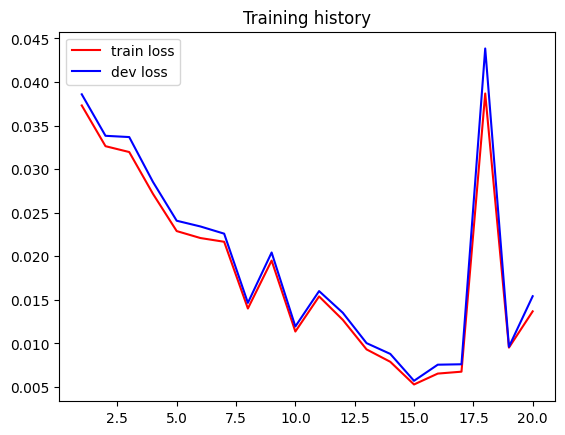

In [ ]:
plt.plot([i + 1 for i in range(len(history))], [history[i][0] for i in range(len(history))], color='r', label='train loss')
plt.plot([i + 1 for i in range(len(history))], [history[i][1] for i in range(len(history))], color='b', label='dev loss')
plt.legend()
plt.title('Training history')
plt.show()

In [ ]:
# history

In [ ]:
# https://www.kaggle.com/code/puru98/federated-learning-pytorch

In [ ]:
# https://github.com/mengmenm/SMIL

## **B3.MAML**

In [ ]:
!pip install higher >/dev/null

In [ ]:
# Basic MAML
from tqdm import tqdm
import torch
from torchvision.datasets import MNIST
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
import torch.nn.functional as F
import torch.optim as optim
import torch.nn as nn
import higher  # Library for MAML

# Simple CNN model
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(7*7*64, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2(x), 2))
        x = x.view(x.size(0), -1)  # Flatten the tensor
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Custom Dataset for MAML
class MAMLDataset(Dataset):
    def __init__(self, dataset, task_size, support_size):
        self.dataset = dataset
        self.task_size = task_size
        self.support_size = support_size

    def __len__(self):
        return len(self.dataset) // self.task_size

    def __getitem__(self, idx):
       # get dataset for this task, not individual data point
        task_dataset = torch.utils.data.Subset(self.dataset, range(idx * self.task_size, (idx + 1) * self.task_size))

        support_indices = torch.randperm(self.task_size)[:self.support_size]
        query_indices = torch.randperm(self.task_size)[self.support_size:]

        support_set = torch.utils.data.Subset(task_dataset, support_indices)
        query_set = torch.utils.data.Subset(task_dataset, query_indices)

        support_images = torch.stack([s[0] for s in support_set])
        support_labels = torch.tensor([s[1] for s in support_set])
        query_images = torch.stack([q[0] for q in query_set])
        query_labels = torch.tensor([q[1] for q in query_set])

        return {'support': (support_images, support_labels), 'query': (query_images, query_labels)}

# MAML Training Function
def maml_train(model, dataloader, inner_lr, meta_lr, steps_per_task, epochs, k_shots):
    meta_optimizer = optim.Adam(model.parameters(), lr=meta_lr)
    lr_scheduler = optim.lr_scheduler.StepLR(meta_optimizer, step_size=1, gamma=0.5)

    for epoch in range(epochs):
        total_meta_loss = 0
        total_k_shot_accuracy = 0

        for task_data in dataloader: #itereate over all tasks, each task has 1000 samples
            support_set = task_data['support'][0].squeeze(0), task_data['support'][1].squeeze(0).to('cuda')
            query_set = task_data['query'][0].squeeze(0), task_data['query'][1].squeeze(0).to('cuda')

            support_images, support_labels = support_set
            query_images, query_labels = query_set
            #####
            support_images, support_labels = support_images.to(device), support_labels.to(device)
            query_images, query_labels = query_images.to(device), query_labels.to(device)

            # When the model is adapted to a specific task in the inner loop of MAML, these adaptations are applied to fmodel. However,
            # these changes are not directly applied to the original model.
            # Instead, they are used to calculate how well the model can adapt to new tasks,
            #which is then used to update the original model's parameters in the outer loop.
            with higher.innerloop_ctx(model, meta_optimizer,copy_initial_weights=False) as (fmodel, diffopt):
                for _ in range(steps_per_task):
                    pred = fmodel(support_images)
                    loss = F.cross_entropy(pred, support_labels)
                    diffopt.step(loss)

                query_pred = fmodel(query_images)
                query_loss = F.cross_entropy(query_pred, query_labels)
                total_meta_loss += query_loss.item()

                # Calculate k-shot accuracy
                with torch.no_grad():
                    correct = (query_pred.argmax(dim=1) == query_labels).sum().item()
                    k_shot_accuracy = correct / query_labels.size(0)
                    total_k_shot_accuracy += k_shot_accuracy

                query_loss.backward() # gradients are computed based on the fmodel, so it has to be put indside of the with statement
            meta_optimizer.step() # update the original model's parameters ,if put this inside the with statement, it means updating the model parameters while still in the process of adapting the model to a specific task(error)
            meta_optimizer.zero_grad()

        # lr_scheduler.step()

        avg_meta_loss = total_meta_loss / len(dataloader)
        avg_k_shot_accuracy = total_k_shot_accuracy / len(dataloader)
        print(f"Epoch {epoch+1}/{epochs} - Meta Loss: {avg_meta_loss:.4f}, K-Shot Accuracy: {avg_k_shot_accuracy:.4f}")


# Transform
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# MNIST Dataset
mnist_trainset = MNIST(root='./data', train=True, download=True, transform=transform)

# MAML Dataset
maml_dataset = MAMLDataset(mnist_trainset, task_size=1000, support_size=500)
maml_dataloader = DataLoader(maml_dataset, batch_size=1)

# MNIST Test Dataset
mnist_testset = MNIST(root='./data', train=False, download=True, transform=transform)

# MAML Test Dataset
maml_test_dataset = MAMLDataset(mnist_testset, task_size=1000, support_size=500)
maml_test_dataloader = DataLoader(maml_test_dataset, batch_size=1) # batch 2 will return error?


# Model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SimpleCNN().to('cuda')

# Hyperparameters
inner_lr = 0.01
meta_lr = 0.001
steps_per_task = 3
epochs = 5

# Train the model using MAML
# maml_train(model, maml_dataloader, inner_lr, meta_lr, steps_per_task, epochs)
maml_train(model, maml_dataloader, inner_lr, meta_lr, steps_per_task, epochs, k_shots=3)

Epoch 1/5 - Meta Loss: 0.4469, K-Shot Accuracy: 0.8834
Epoch 2/5 - Meta Loss: 0.1171, K-Shot Accuracy: 0.9657
Epoch 3/5 - Meta Loss: 0.0730, K-Shot Accuracy: 0.9787
Epoch 4/5 - Meta Loss: 0.0571, K-Shot Accuracy: 0.9831
Epoch 5/5 - Meta Loss: 0.0451, K-Shot Accuracy: 0.9865


###**B3 MAML Test**

In [ ]:
def maml_test(model, dataloader, steps_per_task):
    taskwise_results = []

    model.eval()  # Set the model to evaluation mode

    for task_data in dataloader:
        support_set = (task_data['support'][0].squeeze(0).to(device), task_data['support'][1].squeeze(0).to(device))
        query_set = (task_data['query'][0].squeeze(0).to(device), task_data['query'][1].squeeze(0).to(device))

        support_images, support_labels = support_set
        query_images, query_labels = query_set

        with higher.innerloop_ctx(model, optim.SGD(model.parameters(), lr=0.01)) as (fmodel, diffopt):
            # Adapt the model to the support set
            for _ in range(steps_per_task):
                pred = fmodel(support_images)
                loss = F.cross_entropy(pred, support_labels)
                diffopt.step(loss)

            # Evaluate on the query set
            fmodel.eval()
            with torch.no_grad():
                query_pred = fmodel(query_images)
                query_loss = F.cross_entropy(query_pred, query_labels)

                correct = (query_pred.argmax(dim=1) == query_labels).sum().item()
                accuracy = correct / query_labels.size(0)

            taskwise_results.append((query_loss.item(), accuracy))

    # Displaying results for each task
    for i, (loss, acc) in enumerate(taskwise_results, 1):
        print(f"Task {i} - Loss: {loss:.4f}, Accuracy: {acc:.4f}")

    # Overall performance
    avg_loss = sum(loss for loss, _ in taskwise_results) / len(taskwise_results)
    avg_acc = sum(acc for _, acc in taskwise_results) / len(taskwise_results)
    print(f"\nOverall Test Performance - Average Loss: {avg_loss:.4f}, Average Accuracy: {avg_acc:.4f}")

# Call the test function
maml_test(model, maml_test_dataloader, steps_per_task=1)

Task 1 - Loss: 0.3933, Accuracy: 0.8800
Task 2 - Loss: 0.4152, Accuracy: 0.8840
Task 3 - Loss: 0.4927, Accuracy: 0.8380
Task 4 - Loss: 0.4402, Accuracy: 0.8700
Task 5 - Loss: 0.4162, Accuracy: 0.8780
Task 6 - Loss: 0.3465, Accuracy: 0.8920
Task 7 - Loss: 0.2954, Accuracy: 0.9020
Task 8 - Loss: 0.2615, Accuracy: 0.9140
Task 9 - Loss: 0.2081, Accuracy: 0.9260
Task 10 - Loss: 0.3663, Accuracy: 0.8700

Overall Test Performance - Average Loss: 0.3635, Average Accuracy: 0.8854


## **B5.MetaMultiFed**

In [60]:
!pip install higher >/dev/null
from tqdm import tqdm
import torch
from torchvision.datasets import MNIST
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
import torch.nn.functional as F
import torch.optim as optim
import torch.nn as nn
import higher  # Library for MAML

### **B4.0 Define Federated NN Structure**

In [61]:
def get_device():
    return torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

def to_device(data, device):
    if isinstance(data, (list, tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

# wraps the DeviceDataLoader around a DataLoader, during iteration of DeviceDataLoader, it
# internally itereates over the batches provided by the original DataLoader (trainingset dataloader) and move the batch to device
class DeviceDataLoader(DataLoader):
        def __init__(self, dl, device):
            self.dl = dl
            self.device = device

        def __iter__(self):
            for batch in self.dl:
                yield to_device(batch, self.device)

        def __len__(self):
            return len(self.dl)


class LayerWithNames(nn.Module):
    def __init__(self, layers):
        super(LayerWithNames, self).__init__()
        for name, layer in layers:
            self.add_module(name, layer)
    def forward(self, x):
        # Define the forward pass through each layer in the module
        for layer_name, layer in self._modules.items():
            x = layer(x)
        return x

class FederatedNet(torch.nn.Module):
    def __init__(self):
        super(FederatedNet, self).__init__()

        #   Worked
        # Image branch
        image_branch_layers = [
            ('conv1', nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)),
            ('relu1', nn.ReLU()),
            ('maxpool1', nn.MaxPool2d(kernel_size=2, stride=2)),
            ('conv2', nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)),
            ('relu2', nn.ReLU()),
            ('maxpool2', nn.MaxPool2d(kernel_size=2, stride=2))
        ]
        self.image_branch = LayerWithNames(image_branch_layers)

        # Spectrogram branch
        spectrogram_branch_layers = [
            ('conv1', nn.Conv2d(4, 32, kernel_size=3, stride=1, padding=1)),
            ('relu1', nn.ReLU()),
            ('maxpool1', nn.MaxPool2d(kernel_size=2, stride=2)),
            ('conv2', nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)),
            ('relu2', nn.ReLU()),
            ('maxpool2', nn.MaxPool2d(kernel_size=2, stride=2)),
            ('conv3', nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1)),
            ('relu3', nn.ReLU()),
            ('maxpool3', nn.MaxPool2d(kernel_size=2, stride=2)),
            ('conv4', nn.Conv2d(64, 64, kernel_size=2, stride=1))
        ]
        self.spectrogram_branch = LayerWithNames(spectrogram_branch_layers)

        # Sign branch
        sign_branch_layers = [
            ('conv1', nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)),
            ('relu1', nn.ReLU()),
            ('maxpool1', nn.MaxPool2d(kernel_size=2, stride=2)),
            ('conv2', nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)),
            ('relu2', nn.ReLU()),
            ('maxpool2', nn.MaxPool2d(kernel_size=2, stride=2))
        ]
        self.sign_branch = LayerWithNames(sign_branch_layers)

        # Initialize the fully connected layer with the maximum size
        self.fc1_max_size = 64 * 7 * 7 * 3  # when all three modalities are present
        # Final fully connected layers
        self.fc1 = nn.Linear(self.fc1_max_size, 128)  # if there's only 1 modality should be 64 * 7 * 7, 2 modality: 64 * 7 * 7 *2, 3 modality: 64 * 7 * 7*3
        self.fc2 = nn.Linear(128, 10)  # Output layer for 10 classes

        # Layer Track
        self.track_layers = {**dict(self.image_branch._modules), **dict(self.spectrogram_branch._modules), **dict(self.sign_branch._modules)}
        self.track_layers['fc1'] = self.fc1
        self.track_layers['fc2'] = self.fc2

    def forward(self, x_img=None, x_sp=None, x_sign=None, modalities=('image', 'spectrogram', 'sign')):
        outputs = []
        # print("###################")
        # print("x_img size:", x_img.size())
        # print("x_sp size:", x_sp.size())
        # print("x_sign size:", x_sign.size())
        # #active_modalities = 0
        # import pdb;pdb.set_trace()
        if 'image' in modalities and x_img is not None:
            x_img = x_img.unsqueeze(1)
            img_out = self.image_branch(x_img)
            #active_modalities += 1
        else:
            img_out = torch.zeros(x_img.size(0), 512).to(device)
        outputs.append(img_out)

        if 'spectrogram' in modalities and x_sp is not None:
            sp_out = self.spectrogram_branch(x_sp.permute(0, 3, 1, 2).to(torch.float32))
            #active_modalities += 1
        else:
            sp_out = torch.zeros(x_sp.size(0), 512).to(device)
        outputs.append(sp_out)

        if 'sign' in modalities and x_sign is not None:
            # x_sign_resized = self.resize_transform(x_sign)
            x_sign = x_sign.unsqueeze(1)
            sign_out = self.sign_branch(x_sign)  # Add channel dimension
            #active_modalities += 1
            # import pdb;pdb.set_trace()
            # sign_out = self.sign_branch(x_sign)
        else:
            sign_out = torch.zeros(x_sign.size(0), 512).to(device)
        outputs.append(sign_out)

        # print("###################")
        # # Print output sizes after each branch
        # print("img_out size:", img_out.size())
        # print("sp_out size:", sp_out.size())
        # print("sign_out size:", sign_out.size())

        # Flatten and combine
        # Flatten the outputs from each branch
        img_out_flat = img_out.reshape(img_out.size(0), -1)  # Reshape to [64, 64*7*7]
        sp_out_flat = sp_out.reshape(sp_out.size(0), -1)    # Reshape to [64, 64*7*7]
        sign_out_flat = sign_out.reshape(sign_out.size(0), -1)  # Reshape to [64, 64*7*7]

        # print("###################")
        #  # Print output sizes after each branch
        # print("img_out_flat size:", img_out_flat.size())
        # print("sp_out_flat size:", sp_out_flat.size())
        # print("sign_out_flat size:", sign_out_flat.size())

        # Concatenate the flattened outputs
        combined = torch.cat((img_out_flat, sp_out_flat, sign_out_flat), dim=1)  # Shape: [64, 64*7*7*3]
        # # Debugging: Print the size of the combined tensor
        # print("Combined size:", combined.size()) # [16,4160]

        # Get the size of the combined tensor's feature dimension
        combined_size = combined.size(1)  # This gets the number of features

        # Use only the relevant part of self.fc1
        fc1_weight = self.fc1.weight[:, :combined_size]
        fc1_bias = self.fc1.bias
        x = F.relu(F.linear(combined, fc1_weight, fc1_bias))
        x = self.fc2(x)
        return x

    def get_track_layers(self):
        return self.track_layers

    def apply_parameters(self, parameters_dict):
        with torch.no_grad():
            for layer_name, layer in self.track_layers.items():
                if hasattr(layer, 'weight'):
                    layer.weight.data *= 0
                    if hasattr(layer, 'bias'):
                        layer.bias.data *= 0
                    layer.weight.data += parameters_dict[layer_name]['weight']
                    if hasattr(layer, 'bias'):
                        layer.bias.data += parameters_dict[layer_name]['bias']

    def get_parameters(self):
        parameters_dict = dict()
        for layer_name, layer in self.track_layers.items():
            if hasattr(layer, 'weight'):
                parameters_dict[layer_name] = {
                    'weight': layer.weight.data,
                    'bias': layer.bias.data if hasattr(layer, 'bias') else None
                }
        return parameters_dict

    def batch_accuracy(self, outputs, labels):
        # print(outputs.shape, labels.shape) torch.Size([64, 10]) torch.Size([64, 1])
        with torch.no_grad():
            _, predictions = torch.max(outputs, dim=1)
            return torch.tensor(torch.sum(predictions == labels.unsqueeze(-1)).item() / len(predictions))

    def _process_batch(self, batch, modalities=('image', 'spectrogram', 'sign')):
        images, specs, signs, labels = batch
        outputs = self(images, specs, signs, modalities)
        loss = torch.nn.functional.cross_entropy(outputs, labels.squeeze())
        # print(outputs.shape, labels.shape) torch.Size([64, 10]) torch.Size([64])
        accuracy = self.batch_accuracy(outputs, labels)

        # print(accuracy)
        return (loss, accuracy)

    def meta_fit(self,device, meta_lr,inner_lr,steps_per_task,data_loader,
                 epochs,support_modalities,query_modalities):

        meta_optimizer = optim.Adam(self.parameters(), lr=meta_lr)
        #lr_scheduler = optim.lr_scheduler.StepLR(meta_optimizer, step_size=1, gamma=0.5)

        # move all data to device
        data_loader = DeviceDataLoader(data_loader, device)

        for epoch in range(epochs):
            total_meta_loss = 0
            total_accuracy = 0

            support_set_proportion = 0.2
            for task_data in data_loader: # for now there's only 1 batch, task_data contains all data within this client
                # split the data into support and query set
                support_set_size = int(len(task_data[0]) * support_set_proportion) #24 for support, 224 for query
                # print("********************")
                # print(f"support_set_size: {support_set_size}")
                # print(f"query_set_size: {len(task_data[0]) -support_set_size}")
                # Split the batch into support and query sets, maintaining the tuple structure
                support_set = tuple(x[:support_set_size] for x in task_data)
                query_set = tuple(x[support_set_size:] for x in task_data)

                support_img, support_sp, support_sign, support_target = support_set
                # print("********************")
                # print(f"support_img size: {support_img.size()}")
                # print(f"support_sp size: {support_sp.size()}")
                # print(f"support_sign size: {support_sign.size()}")
                # print(f"support_target size: {support_target.size()}")
                query_img, query_sp, query_sign, query_target = query_set

                # Create a custom optimizer for the inner loop with the specified inner learning rate
                inner_optimizer = optim.Adam(self.parameters(), lr=inner_lr)
                # When the model is adapted to a specific task in the inner loop of MAML, these adaptations are applied to fmodel. However,
                # these changes are not directly applied to the original model.
                # Instead, they are used to calculate how well the model can adapt to new tasks,
                #which is then used to update the original model's parameters in the outer loop.
                with higher.innerloop_ctx(self, inner_optimizer,copy_initial_weights=False) as (fmodel, diffopt):
                    for _ in range(steps_per_task):
                        support_pred = fmodel(support_img, support_sp, support_sign,support_modalities)
                        support_loss = F.cross_entropy(support_pred, support_target)
                        diffopt.step(support_loss)

                    query_pred = fmodel(query_img, query_sp, query_sign, query_modalities)
                    query_loss = F.cross_entropy(query_pred, query_target)
                    total_meta_loss += query_loss.item()

                    # Calculate k-shot accuracy
                    with torch.no_grad():
                        correct = (query_pred.argmax(dim=1) == query_target).sum().item()
                        k_shot_accuracy = correct / query_target.size(0)
                        total_accuracy += k_shot_accuracy

                    query_loss.backward() # gradients are computed based on the fmodel, so it has to be put indside of the with statement
                meta_optimizer.step() # update the original model's parameters ,if put this inside the with statement, it means updating the model parameters while still in the process of adapting the model to a specific task(error)
                meta_optimizer.zero_grad()

            # lr_scheduler.step()
            # print(f"data_loader size is: {len(data_loader)}")
            avg_meta_loss = total_meta_loss / len(data_loader) # average loss per batch
            avg_accuracy = total_accuracy / len(data_loader)
            print(f"Client Local Meta-Learning, Epoch {epoch+1}/{epochs} - Loss: {avg_meta_loss:.4f}, Accuracy: {avg_accuracy:.4f}")


    def evaluate(self, dataset, modalities=('image', 'spectrogram', 'sign')): # testing will use full modalities
        data_loader = DataLoader(dataset, batch_size=len(dataset))
        data_loader_d = DeviceDataLoader(data_loader, device)
        criterion = nn.CrossEntropyLoss()
        losses = []
        accs = []
        #######
        test_loss = 0
        correct = 0
        #######
        with torch.no_grad():
            for (data_img, data_sp, data_sign, target) in data_loader_d:
                data_img, data_sp, data_sign, target = data_img.to(device), data_sp.to(device), data_sign.to(device), target.to(device)
                #data_img, data_sp, data_sign = data_img.unsqueeze(1), data_sp, data_sign  # No need to send data_sp to device again
                loss, acc = self._process_batch((data_img, data_sp, data_sign, target), modalities)

                # print(acc) ########################
                output = self(data_img, data_sp, data_sign, modalities)
                test_loss += criterion(output, target).item()
                pred = output.argmax(dim=1, keepdim=True)
                correct += pred.eq(target.view_as(pred)).sum().item()

                #####################################
                losses.append(loss)
                accs.append(acc)
        #######################
        test_loss /= len(dataset)
        test_accuracy = 100. * correct / len(dataset)
        # print(test_loss, test_accuracy)
        #######################
        avg_loss = torch.stack(losses).mean().item()
        avg_acc = torch.stack(accs).mean().item()
        # return (avg_loss, avg_acc)
        return test_loss, test_accuracy

### **B4.1 Define the Multi-Modal dataset**

In [62]:
class FedMultiModalDataset(Dataset):
    def __init__(self, images, spectrograms, signs, labels):
        self.images = images
        self.spectrograms = spectrograms
        self.signs = signs
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        image = self.images[idx]
        spectrogram = self.spectrograms[idx]
        sign = self.signs[idx]
        label = self.labels[idx]
        return image, spectrogram, sign, label

# Split your dataset into training and testing sets
total_samples = len(filtered_combined_images)
test_samples = int(0.20 * total_samples)
train_samples = total_samples - test_samples

# Convert torch tensors to numpy arrays for easier splitting
# filtered_combined_images = filtered_combined_images.numpy().astype(np.float32)

# each data point in train_dataset is a tuple (image, spectrogram, sign, label), which is defined by the return value of MultiModalDataset
train_dataset, test_dataset = random_split(
    FedMultiModalDataset(filtered_combined_images, filtered_fsdd_spectrograms, sld_sign, sld_sign_label), # 2062
    [train_samples, test_samples]
)

total_train_size = len(train_dataset)
total_test_size = len(test_dataset)

# # Define batch size
# batch_size = 16

# # Create data loaders for training and validation
# train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
# test_loader = DataLoader(test_dataset, batch_size=batch_size)

# Check the number of samples in each split
print(f"Number of samples in training set 3 modalities: {total_train_size}")
print(f"Number of samples in testing set 3 modalities: {total_test_size}")


Number of samples in training set 3 modalities: 1650
Number of samples in testing set 3 modalities: 412


### **B4.2 Define Client**

In [63]:
class Client:
    def __init__(self, client_id, training_set,loacl_epochs,support_modalities,query_modalities):
        self.client_id = client_id
        self.training_set = training_set
        self.local_epochs = loacl_epochs
        self.support_modalities = support_modalities
        self.query_modalities = query_modalities

    def get_dataset_size(self):
        return len(self.training_set)

    def get_client_id(self):
        return self.client_id

    def train(self, parameters_dict):
        print(f"{self.client_id}:")
        net = to_device(FederatedNet(), device)
        net.apply_parameters(parameters_dict) # parameters_dict comes from the global model at in the begining of each round
        # optimizer = optim.Adam(net.parameters(), lr=0.001)
        #use full batch training for each client
        training_loader = DataLoader(self.training_set, batch_size=len(self.training_set))

        meta_lr =0.01
        inner_lr = 0.00001

        net.meta_fit(device, meta_lr,inner_lr,epochs_per_client, training_loader, self.local_epochs, self.support_modalities,self.query_modalities)
        # print('{}: Loss = {}, Accuracy = {}'.format(self.client_id, round(train_history[-1][0], 4), round(train_history[-1][1], 4)))
        # print('{} after {} Epochs: Loss = {}, Accuracy = {}'.format(self.client_id, self.epochs, round(train_history[-1][0], 4), round(train_history[-1][1], 4)))

        return net.get_parameters()


### **B4.2 Federated Training**

In [64]:
import gc
gc.collect()
torch.cuda.empty_cache()
torch.cuda.memory_summary(device=None, abbreviated=True)

'|===========================================================================|\n|                  PyTorch CUDA memory summary, device ID 0                 |\n|---------------------------------------------------------------------------|\n|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |\n|===========================================================================|\n|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |\n|---------------------------------------------------------------------------|\n| Allocated memory      |      0 B   |      0 B   |      0 B   |      0 B   |\n|---------------------------------------------------------------------------|\n| Active memory         |      0 B   |      0 B   |      0 B   |      0 B   |\n|---------------------------------------------------------------------------|\n| Requested memory      |      0 B   |      0 B   |      0 B   |      0 B   |\n|--------------------------------------------------

In [65]:
num_clients = 3
global_rounds = 40
device = torch.device("cuda")
epochs_per_client = 5
train_examples_per_client = total_train_size // num_clients
# Calculate the support/query sizes for each client
training_sizes = [train_examples_per_client for _ in range(num_clients)]

# Distribute the remainder
training_remainder = total_train_size - sum(training_sizes)
for i in range(training_remainder):
    training_sizes[i] += 1

# print(f"training size is {training_sizes}")
# Create the splits
assert sum(training_sizes) == total_train_size, "Sum of split sizes does not match the training dataset size"
client_training_set = random_split(train_dataset, training_sizes)
# print(f"client_training_set size: {len(client_training_set)}")
# print(f"client_training_set : {client_training_set}")
one_modality_list = [('image'),('spectrogram'),('sign')]
two_modality_list = [('image','spectrogram'),('image','sign'),('spectrogram','sign')]

missing_modality_list = [('image'),('spectrogram'),('sign'),('image','spectrogram'),('image','sign'),('spectrogram','sign')]
# Initialize clients (these sets of clients only have 1 modality data)
clients_one = [Client(f'client_{i}', client_training_set[i],epochs_per_client,support_modalities=one_modality_list[i%3],query_modalities=('image', 'spectrogram', 'sign')) for i in range(num_clients)]

# Initialize clients (these sets of clients only have 2 modality data)
clients_two = [Client(f'client_{i}', client_training_set[i],epochs_per_client,support_modalities=two_modality_list[i%3],query_modalities=('image', 'spectrogram', 'sign')) for i in range(num_clients)]

# Initialize clients (these sets of clients only have 2 modality data)
clients_full = [Client(f'client_{i}', client_training_set[i],epochs_per_client,support_modalities=('image', 'spectrogram', 'sign'),query_modalities=('image', 'spectrogram', 'sign')) for i in range(num_clients)]

clients_list = []
for j in range(6):
  clients_list.append([Client(f'client_{i}', client_training_set[i],epochs_per_client,support_modalities=missing_modality_list[j],query_modalities=('image', 'spectrogram', 'sign')) for i in range(num_clients)])
"""
experiment setting: The query set is always full modality, we will conduct 2 experiments to see if the client only have 2 modality and if clients only
have 1 modality, will our meta-learning algo help gain better accuracy, and help learn faster (if the base line can also get us to high acc given more epochs)
"""


total_history = []
test_results = []
for exp in range(6):
  experiment_history = []
  new_fed_net = FederatedNet()
  global_net = to_device(new_fed_net, device)
  for i in range(global_rounds):
      print('Start Round {} ...'.format(i + 1))
      curr_parameters = global_net.get_parameters()
      new_parameters = dict([(layer_name, {'weight': 0, 'bias': 0}) for layer_name in curr_parameters])
      for client in clients_list[j]:
          client_parameters = client.train(curr_parameters)
          fraction = client.get_dataset_size() / total_train_size
          for layer_name in client_parameters:
              new_parameters[layer_name]['weight'] += fraction * client_parameters[layer_name]['weight']
              new_parameters[layer_name]['bias'] += fraction * client_parameters[layer_name]['bias']
      global_net.apply_parameters(new_parameters)

      train_loss, train_acc = global_net.evaluate(train_dataset)
      test_loss, test_acc = global_net.evaluate(test_dataset)
      print('After round {}, global train_loss = {}, global train_acc = {}, global test_loss = {}, global test_acc = {}\n'.format(i + 1, round(train_loss, 4), round(train_acc, 4),
              round(test_loss, 4), round(test_acc, 4)))
      experiment_history.append((train_loss, test_loss))
  test_loss, test_acc = global_net.evaluate(test_dataset)
  total_history.append(experiment_history)
  test_results.append((test_loss, test_acc))
  print(f"testing result: {test_results}")



Streaming output truncated to the last 5000 lines.
Client Local Meta-Learning, Epoch 3/5 - Loss: 248.5660, Accuracy: 0.0977
Client Local Meta-Learning, Epoch 4/5 - Loss: 15.8925, Accuracy: 0.0977
Client Local Meta-Learning, Epoch 5/5 - Loss: 13.4827, Accuracy: 0.0864
client_1:
Client Local Meta-Learning, Epoch 1/5 - Loss: 37.4452, Accuracy: 0.0864
Client Local Meta-Learning, Epoch 2/5 - Loss: 25.5535, Accuracy: 0.1023
Client Local Meta-Learning, Epoch 3/5 - Loss: 13.4815, Accuracy: 0.1068
Client Local Meta-Learning, Epoch 4/5 - Loss: 4.4004, Accuracy: 0.0932
Client Local Meta-Learning, Epoch 5/5 - Loss: 3.3963, Accuracy: 0.0932
client_2:
Client Local Meta-Learning, Epoch 1/5 - Loss: 92.9257, Accuracy: 0.0886
Client Local Meta-Learning, Epoch 2/5 - Loss: 2617.3762, Accuracy: 0.1068
Client Local Meta-Learning, Epoch 3/5 - Loss: 219.4898, Accuracy: 0.0886
Client Local Meta-Learning, Epoch 4/5 - Loss: 103.3160, Accuracy: 0.0795
Client Local Meta-Learning, Epoch 5/5 - Loss: 34.2694, Accurac

### **B.4.3 Training/Testing Loss plotting**

In [66]:
with open('/content/drive/MyDrive/10719/MLMF/results/mlfl/other_exps/outer_lr/mlr=0.01-ilr=0.00001-total_history.txt', 'w') as file:
    for item in total_history:
        file.write(f"{item}\n")
with open('/content/drive/MyDrive/10719/MLMF/results/mlfl/other_exps/outer_lr/mlr=0.01-ilr=0.00001-test_results.txt', 'w') as file:
    for item in test_results:
        file.write(f"{item}\n")

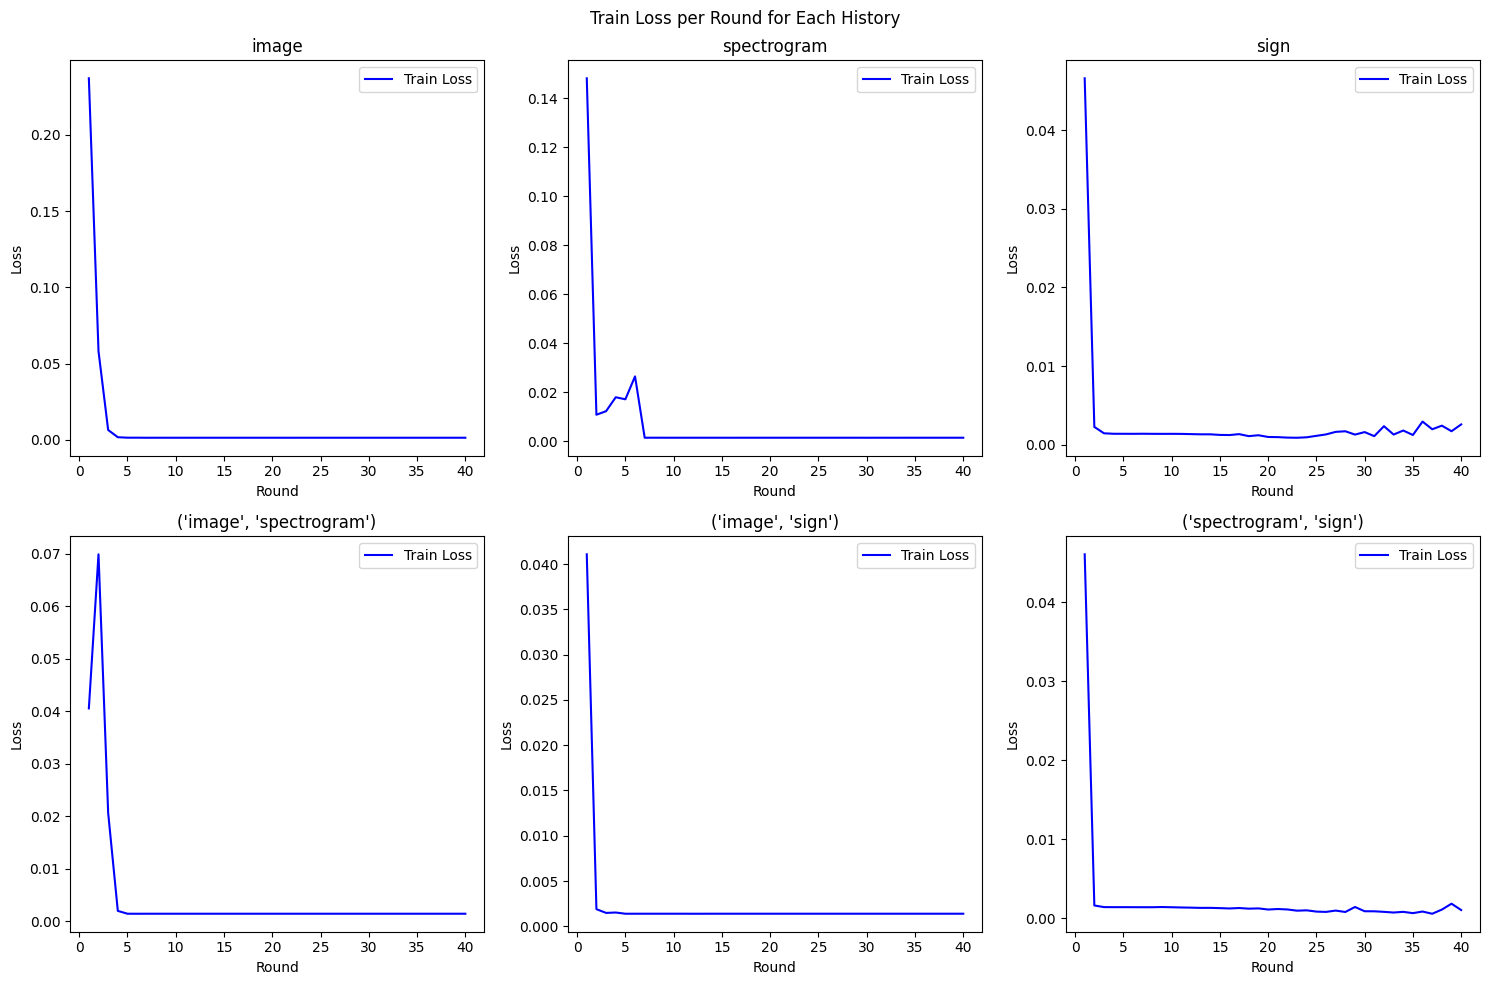

In [67]:
import matplotlib.pyplot as plt

def plot_mlmf_loss(total_history):
  fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))  # Adjust the size as needed
  fig.suptitle('Train Loss per Round for Each History')

  missing_modality_list = [('image'),('spectrogram'),('sign'),('image','spectrogram'),('image','sign'),('spectrogram','sign')]
  for i, history in enumerate(total_history):
      # Calculate the row and column index for the current subplot
      row = i // 3
      col = i % 3

    # Extract train_loss and test_loss from each tuple in the current history
      train_losses = [train_loss for train_loss, _ in history]
      test_losses = [test_loss for _, test_loss in history]

      # Create a list of rounds (1, 2, 3, ...)
      rounds = list(range(1, len(history) + 1))

      # Plot train and test losses on the subplot
      ax = axes[row, col]
      ax.plot(rounds, train_losses, label='Train Loss', color='blue')
      #ax.plot(rounds, test_losses, label='Test Loss', color='red')
      ax.set_xlabel('Round')
      ax.set_ylabel('Loss')
      ax.set_title(f'{missing_modality_list[i]}')
      ax.legend()

  plt.tight_layout()  # Adjusts the plots to fit into the figure area.
  plt.savefig(f"/content/drive/MyDrive/10719/MLMF/results/mlfl/other_exps/outer_lr/mlr=0.01-ilr=0.00001-training.png")
  plt.show()


plot_mlmf_loss(total_history)

#### more experments

In [ ]:
################# replicate
num_clients = 3
global_rounds = 25
batch_size = 64
epochs_per_client = 10
learning_rate = 2e-3
device = torch.device("cuda")

train_examples_per_client = total_train_size // num_clients
# Calculate the support/query sizes for each client
training_sizes = [train_examples_per_client for _ in range(num_clients)]

# Distribute the remainder
training_remainder = total_train_size - sum(training_sizes)
for i in range(training_remainder):
    training_sizes[i] += 1

# Create the splits
assert sum(training_sizes) == total_train_size, "Sum of split sizes does not match the training dataset size"
client_training_set = random_split(train_dataset, training_sizes)

# Initialize clients
clients = [Client(f'client_{i}', client_training_set[i],epochs_per_client,support_modalities=('image', 'spectrogram', 'sign'),query_modalities=('image', 'spectrogram', 'sign')) for i in range(num_clients)]


global_net = to_device(FederatedNet(), device)
history = []
for i in range(global_rounds):
    print('Start Round {} ...'.format(i + 1))
    curr_parameters = global_net.get_parameters()
    new_parameters = dict([(layer_name, {'weight': 0, 'bias': 0}) for layer_name in curr_parameters])
    for client in clients:
        client_parameters = client.train(curr_parameters)
        fraction = client.get_dataset_size() / total_train_size
        for layer_name in client_parameters:
            new_parameters[layer_name]['weight'] += fraction * client_parameters[layer_name]['weight']
            new_parameters[layer_name]['bias'] += fraction * client_parameters[layer_name]['bias']
    global_net.apply_parameters(new_parameters)

    train_loss, train_acc = global_net.evaluate(train_dataset)
    test_loss, test_acc = global_net.evaluate(test_dataset)
    print('After round {}, global train_loss = {}, global train_acc = {}, global test_loss = {}, global test_acc = {}\n'.format(i + 1, round(train_loss, 4), round(train_acc, 4),
            round(test_loss, 4), round(test_acc, 4)))
    history.append((train_loss, test_loss))
test_loss, test_acc = global_net.evaluate(test_dataset)
print(f"final loss on testing set is: {test_loss}")



In [ ]:
################# setting to get 100% acc
num_clients = 5
global_rounds = 30
batch_size = 64
epochs_per_client = 10
learning_rate = 2e-3
device = torch.device("cuda")

train_examples_per_client = total_train_size // num_clients
# Calculate the support/query sizes for each client
training_sizes = [train_examples_per_client for _ in range(num_clients)]

# Distribute the remainder
training_remainder = total_train_size - sum(training_sizes)
for i in range(training_remainder):
    training_sizes[i] += 1

# Create the splits
assert sum(training_sizes) == total_train_size, "Sum of split sizes does not match the training dataset size"
client_training_set = random_split(train_dataset, training_sizes)

# Initialize clients
clients = [Client(f'client_{i}', client_training_set[i],epochs_per_client,support_modalities=('image', 'spectrogram', 'sign'),query_modalities=('image', 'spectrogram', 'sign')) for i in range(num_clients)]


global_net = to_device(FederatedNet(), device)
history = []
for i in range(global_rounds):
    print('Start Round {} ...'.format(i + 1))
    curr_parameters = global_net.get_parameters()
    new_parameters = dict([(layer_name, {'weight': 0, 'bias': 0}) for layer_name in curr_parameters])
    for client in clients:
        client_parameters = client.train(curr_parameters)
        fraction = client.get_dataset_size() / total_train_size
        for layer_name in client_parameters:
            new_parameters[layer_name]['weight'] += fraction * client_parameters[layer_name]['weight']
            new_parameters[layer_name]['bias'] += fraction * client_parameters[layer_name]['bias']
    global_net.apply_parameters(new_parameters)

    train_loss, train_acc = global_net.evaluate(train_dataset)
    test_loss, test_acc = global_net.evaluate(test_dataset)
    print('After round {}, global train_loss = {}, global train_acc = {}, global test_loss = {}, global test_acc = {}\n'.format(i + 1, round(train_loss, 4), round(train_acc, 4),
            round(test_loss, 4), round(test_acc, 4)))
    history.append((train_loss, test_loss))
test_loss, test_acc = global_net.evaluate(test_dataset)
print(f"final testing loss: {test_loss}, final testing accuracy: {test_acc}")



## **B4.SMILMultiFed**
Paper Link: https://arxiv.org/pdf/2103.05677.pdf
Github Link: https://github.com/mengmenm/SMIL

### Deprecated

In [ ]:
cd IEMOCAP

/content/drive/.shortcut-targets-by-id/13HjIT2e4M8H7y9Xxc3kOfNClfPafIoWN/10719/IEMOCAP


In [ ]:
ls

In [ ]:
# !wget --user='iemocap' --password='sail_E^vU#a.=fe8,(mqc' https://sail.usc.edu/databases/iemocap/
# !wget --http-user='iemocap' --http-password='sail_E^vU#a.=fe8,(mqc' https://sail.usc.edu/databases/iemocap/IEMOCAP_full_release.tar.gz #https://sail.usc.edu/databases/iemocap/

In [ ]:
# !wget --http-user='iemocap' --http-password='sail_E^vU#a.=fe8,(mqc' https://sail.usc.edu/databases/iemocap/small/IEMOCAP_full_release_withoutVideos.tar.gz #https://sail.usc.edu/databases/iemocap/

In [ ]:
# !tar -xvf IEMOCAP_full_release.tar.gz

In [ ]:
# !tar -xvf IEMOCAP_full_release_withoutVideos.tar.gz

In [ ]:
class ClassfierNet(nn.Module):

    def __init__(self, output_layers = ['default']):
        super(ClassfierNet, self).__init__()
        self.output_layers = output_layers

        self.fc1 = nn.Linear(160, 32)
        self.fc2 = nn.Linear(32, 10)
        self.dropout = nn.Dropout(p=0.5)
        self.relu = nn.ReLU(inplace=True)
        self.softplus = nn.Softplus()

    def _add_output_and_check(self, name, x, outputs, output_layers):
        if name in output_layers:
            outputs[name] = x
        return len(output_layers) == len(outputs)

    def forward(self, x, noise=None):

        x = x.view(x.size(0), -1)
        if noise is None:
            # print('in none')
            x = self.fc1(x)
            x = self.relu(x)
            x = self.dropout(x)
            f = x
            x = self.fc2(x)

            return x, f

        else:

            x = self.fc1(x)
            x = self.relu(x)
            if 'fc1' in noise.keys():
                # x = x + noise['fc1']
                x = x * noise['fc1']
                f = x

            x = self.fc2(x)
            if 'fc2' in noise.keys():
                # x = x + noise['fc2']
                x = x * noise['fc2']

            return x, f


class ClassfierNetNew(nn.Module):

    def __init__(self, output_layers = ['default']):
        super(ClassfierNetNew, self).__init__()
        self.output_layers = output_layers

        self.fc1 = nn.Linear(160, 32)
        self.fc2 = nn.Linear(32, 10)
        self.dropout = nn.Dropout(p=0.5)
        self.relu = nn.ReLU(inplace=True)

    def _add_output_and_check(self, name, x, outputs, output_layers):
        if name in output_layers:
            outputs[name] = x
        return len(output_layers) == len(outputs)

    def forward(self, x):

        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.relu(x)
        # x = x
        f = x
        x = self.fc2(x)

        return x, f

if __name__ == '__main__':
    import torch.backends.cudnn as cudnn
    import torch
    from torchsummary import summary

    cudnn.benchmark = True
    device = torch.device("cuda")
    cnn = ClassfierNet().to(device)
    images = torch.rand(8, 160).to(device)
    x = cnn(images)
    summary(cnn, (1, 160))

### SMIL Dependencies

In [ ]:
# installing dependencies
! pip install torch==1.4.0
torchvision==0.5.0
MetaNN==0.2.5
numpy==1.18.1
tensorboard==2.1.1
torchsummary==1.5.1
pandas==1.0.3
opencv-python==4.2.0.32
pillow==7.0.0
librosa==0.7.0
numba==0.48.0

In [ ]:
# importing
import torch==1.4.0
import torchvision==0.5.0
import MetaNN==0.2.5
import numpy
import tensorboard==2.1.1
import torchsummary==1.5.1
import pandas==1.0.3
import opencv-python==4.2.0.32
import pillow==7.0.0

# these probably aren't needed ... commenting out jic
#import librosa==0.7.0
#import numba==0.48.0

In [ ]:
# SIML meta/train/test imports
'''
import torch.utils.data
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import torch.nn.functional as F


import numpy as np
import pandas as pd
import os
import cv2
import random
from PIL import Image
import math
import sys
sys.path.append("../")
from utils.wav2mfcc import wav2mfcc
'''

In [ ]:
# using MAML imports
from tqdm import tqdm
import torch
from torchvision.datasets import MNIST
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
import torch.nn.functional as F
import torch.optim as optim
import torch.nn as nn
import higher  # Library for MAML

### SMILMultiFed Datasets

In [ ]:
# MULTIMODAL DATASET
class MultiModalDataset(Dataset):
    def __init__(self, images, spectrograms, signs, labels):
        self.images = images
        self.spectrograms = spectrograms
        self.signs = signs
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        image = self.images[idx]
        spectrogram = self.spectrograms[idx]
        sign = self.signs[idx]
        label = self.labels[idx]
        return image, spectrogram, sign, label



In [ ]:
# Federated Multimodal Dataset
class FedMultiModalDataset(Dataset):
    def __init__(self, images, spectrograms, signs, labels):
        self.images = images
        self.spectrograms = spectrograms
        self.signs = signs
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        image = self.images[idx]
        spectrogram = self.spectrograms[idx]
        sign = self.signs[idx]
        label = self.labels[idx]
        return image, spectrogram, sign, label

# Split your dataset into training and testing sets
total_samples = len(filtered_combined_images)
test_samples = int(0.20 * total_samples)
train_samples = total_samples - test_samples

# Convert torch tensors to numpy arrays for easier splitting
# filtered_combined_images = filtered_combined_images.numpy().astype(np.float32)

# each data point in train_dataset is a tuple (image, spectrogram, sign, label), which is defined by the return value of MultiModalDataset
train_dataset, test_dataset = random_split(
    FedMultiModalDataset(filtered_combined_images, filtered_fsdd_spectrograms, sld_sign, sld_sign_label), # 2062
    [train_samples, test_samples]
)

total_train_size = len(train_dataset)
total_test_size = len(test_dataset)

# # Define batch size
# batch_size = 16

# # Create data loaders for training and validation
# train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
# test_loader = DataLoader(test_dataset, batch_size=batch_size)

# Check the number of samples in each split
print(f"Number of samples in training set 3 modalities: {total_train_size}")
print(f"Number of samples in testing set 3 modalities: {total_test_size}")


### Modeling

In [ ]:
def get_device():
    return torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

def to_device(data, device):
    if isinstance(data, (list, tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

# wraps the DeviceDataLoader around a DataLoader, during iteration of DeviceDataLoader, it
# internally itereates over the batches provided by the original DataLoader (trainingset dataloader) and move the batch to device
class DeviceDataLoader(DataLoader):
        def __init__(self, dl, device):
            self.dl = dl
            self.device = device

        def __iter__(self):
            for batch in self.dl:
                yield to_device(batch, self.device)

        def __len__(self):
            return len(self.dl)


class LayerWithNames(nn.Module):
    def __init__(self, layers):
        super(LayerWithNames, self).__init__()
        for name, layer in layers:
            self.add_module(name, layer)
    def forward(self, x):
        # Define the forward pass through each layer in the module
        for layer_name, layer in self._modules.items():
            x = layer(x)
        return x

class FederatedNet(torch.nn.Module):
    def __init__(self):
        super(FederatedNet, self).__init__()

        #   Worked
        # Image branch
        image_branch_layers = [
            ('conv1', nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)),
            ('relu1', nn.ReLU()),
            ('maxpool1', nn.MaxPool2d(kernel_size=2, stride=2)),
            ('conv2', nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)),
            ('relu2', nn.ReLU()),
            ('maxpool2', nn.MaxPool2d(kernel_size=2, stride=2))
        ]
        self.image_branch = LayerWithNames(image_branch_layers)

        # Spectrogram branch
        spectrogram_branch_layers = [
            ('conv1', nn.Conv2d(4, 32, kernel_size=3, stride=1, padding=1)),
            ('relu1', nn.ReLU()),
            ('maxpool1', nn.MaxPool2d(kernel_size=2, stride=2)),
            ('conv2', nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)),
            ('relu2', nn.ReLU()),
            ('maxpool2', nn.MaxPool2d(kernel_size=2, stride=2)),
            ('conv3', nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1)),
            ('relu3', nn.ReLU()),
            ('maxpool3', nn.MaxPool2d(kernel_size=2, stride=2)),
            ('conv4', nn.Conv2d(64, 64, kernel_size=2, stride=1))
        ]
        self.spectrogram_branch = LayerWithNames(spectrogram_branch_layers)

        # Sign branch
        sign_branch_layers = [
            ('conv1', nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)),
            ('relu1', nn.ReLU()),
            ('maxpool1', nn.MaxPool2d(kernel_size=2, stride=2)),
            ('conv2', nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)),
            ('relu2', nn.ReLU()),
            ('maxpool2', nn.MaxPool2d(kernel_size=2, stride=2))
        ]
        self.sign_branch = LayerWithNames(sign_branch_layers)

        # Initialize the fully connected layer with the maximum size
        self.fc1_max_size = 64 * 7 * 7 * 3  # when all three modalities are present
        # Final fully connected layers
        self.fc1 = nn.Linear(self.fc1_max_size, 128)  # if there's only 1 modality should be 64 * 7 * 7, 2 modality: 64 * 7 * 7 *2, 3 modality: 64 * 7 * 7*3
        self.fc2 = nn.Linear(128, 10)  # Output layer for 10 classes

        # Layer Track
        self.track_layers = {**dict(self.image_branch._modules), **dict(self.spectrogram_branch._modules), **dict(self.sign_branch._modules)}
        self.track_layers['fc1'] = self.fc1
        self.track_layers['fc2'] = self.fc2

    def forward(self, x_img=None, x_sp=None, x_sign=None, modalities=('image', 'spectrogram', 'sign')):
        outputs = []
        # print("###################")
        # print("x_img size:", x_img.size())
        # print("x_sp size:", x_sp.size())
        # print("x_sign size:", x_sign.size())
        # #active_modalities = 0
        # import pdb;pdb.set_trace()
        if 'image' in modalities and x_img is not None:
            x_img = x_img.unsqueeze(1)
            img_out = self.image_branch(x_img)
            #active_modalities += 1
        else:
            img_out = torch.zeros(x_img.size(0), 512).to(device)
        outputs.append(img_out)

        if 'spectrogram' in modalities and x_sp is not None:
            sp_out = self.spectrogram_branch(x_sp.permute(0, 3, 1, 2).to(torch.float32))
            #active_modalities += 1
        else:
            sp_out = torch.zeros(x_sp.size(0), 512).to(device)
        outputs.append(sp_out)

        if 'sign' in modalities and x_sign is not None:
            # x_sign_resized = self.resize_transform(x_sign)
            x_sign = x_sign.unsqueeze(1)
            sign_out = self.sign_branch(x_sign)  # Add channel dimension
            #active_modalities += 1
            # import pdb;pdb.set_trace()
            # sign_out = self.sign_branch(x_sign)
        else:
            sign_out = torch.zeros(x_sign.size(0), 512).to(device)
        outputs.append(sign_out)

        # print("###################")
        # # Print output sizes after each branch
        # print("img_out size:", img_out.size())
        # print("sp_out size:", sp_out.size())
        # print("sign_out size:", sign_out.size())

        # Flatten and combine
        # Flatten the outputs from each branch
        img_out_flat = img_out.reshape(img_out.size(0), -1)  # Reshape to [64, 64*7*7]
        sp_out_flat = sp_out.reshape(sp_out.size(0), -1)    # Reshape to [64, 64*7*7]
        sign_out_flat = sign_out.reshape(sign_out.size(0), -1)  # Reshape to [64, 64*7*7]

        # print("###################")
        #  # Print output sizes after each branch
        # print("img_out_flat size:", img_out_flat.size())
        # print("sp_out_flat size:", sp_out_flat.size())
        # print("sign_out_flat size:", sign_out_flat.size())

        # Concatenate the flattened outputs
        combined = torch.cat((img_out_flat, sp_out_flat, sign_out_flat), dim=1)  # Shape: [64, 64*7*7*3]
        # # Debugging: Print the size of the combined tensor
        # print("Combined size:", combined.size()) # [16,4160]

        # Get the size of the combined tensor's feature dimension
        combined_size = combined.size(1)  # This gets the number of features

        # Use only the relevant part of self.fc1
        fc1_weight = self.fc1.weight[:, :combined_size]
        fc1_bias = self.fc1.bias
        x = F.relu(F.linear(combined, fc1_weight, fc1_bias))
        x = self.fc2(x)
        return x

    def get_track_layers(self):
        return self.track_layers

    def apply_parameters(self, parameters_dict):
        with torch.no_grad():
            for layer_name, layer in self.track_layers.items():
                if hasattr(layer, 'weight'):
                    layer.weight.data *= 0
                    if hasattr(layer, 'bias'):
                        layer.bias.data *= 0
                    layer.weight.data += parameters_dict[layer_name]['weight']
                    if hasattr(layer, 'bias'):
                        layer.bias.data += parameters_dict[layer_name]['bias']

    def get_parameters(self):
        parameters_dict = dict()
        for layer_name, layer in self.track_layers.items():
            if hasattr(layer, 'weight'):
                parameters_dict[layer_name] = {
                    'weight': layer.weight.data,
                    'bias': layer.bias.data if hasattr(layer, 'bias') else None
                }
        return parameters_dict

    def batch_accuracy(self, outputs, labels):
        # print(outputs.shape, labels.shape) torch.Size([64, 10]) torch.Size([64, 1])
        with torch.no_grad():
            _, predictions = torch.max(outputs, dim=1)
            return torch.tensor(torch.sum(predictions == labels.unsqueeze(-1)).item() / len(predictions))

    def _process_batch(self, batch, modalities=('image', 'spectrogram', 'sign')):
        images, specs, signs, labels = batch
        outputs = self(images, specs, signs, modalities)
        loss = torch.nn.functional.cross_entropy(outputs, labels.squeeze())
        # print(outputs.shape, labels.shape) torch.Size([64, 10]) torch.Size([64])
        accuracy = self.batch_accuracy(outputs, labels)

        # print(accuracy)
        return (loss, accuracy)

    def meta_fit(self,device, meta_lr,steps_per_task,data_loader,
                 epochs,support_modalities,query_modalities):

        meta_optimizer = optim.Adam(self.parameters(), lr=meta_lr)
        #lr_scheduler = optim.lr_scheduler.StepLR(meta_optimizer, step_size=1, gamma=0.5)

        # move all data to device
        data_loader = DeviceDataLoader(data_loader, device)

        for epoch in range(epochs):
            total_meta_loss = 0
            total_accuracy = 0

            support_set_proportion = 0.2
            for task_data in data_loader: # for now there's only 1 batch, task_data contains all data within this client
                # split the data into support and query set
                support_set_size = int(len(task_data[0]) * support_set_proportion) #24 for support, 224 for query
                # print("********************")
                # print(f"support_set_size: {support_set_size}")
                # print(f"query_set_size: {len(task_data[0]) -support_set_size}")
                # Split the batch into support and query sets, maintaining the tuple structure
                support_set = tuple(x[:support_set_size] for x in task_data)
                query_set = tuple(x[support_set_size:] for x in task_data)

                support_img, support_sp, support_sign, support_target = support_set
                # print("********************")
                # print(f"support_img size: {support_img.size()}")
                # print(f"support_sp size: {support_sp.size()}")
                # print(f"support_sign size: {support_sign.size()}")
                # print(f"support_target size: {support_target.size()}")
                query_img, query_sp, query_sign, query_target = query_set


                # When the model is adapted to a specific task in the inner loop of MAML, these adaptations are applied to fmodel. However,
                # these changes are not directly applied to the original model.
                # Instead, they are used to calculate how well the model can adapt to new tasks,
                #which is then used to update the original model's parameters in the outer loop.
                with higher.innerloop_ctx(self, meta_optimizer,copy_initial_weights=False) as (fmodel, diffopt):
                    for _ in range(steps_per_task):
                        '''
                        Modify this to reflect the extractor and noise generation
                        '''
                        support_noised,_,_,_ = MODEL(support_target, support_img, support_sound, support_sign, encoder=encoder,  sound_mean=sound_mean, noise_layer=['fc0','fc1','fc2'], meta_train=True, mode='one')
                        '''
                        support_pred = fmodel(support_img, support_sp, support_sign,support_modalities)
                        support_loss = F.cross_entropy(support_pred, support_target)
                        diffopt.step(support_loss)
                        ''''

                    query_pred = fmodel(query_img, query_sp, query_sign, query_modalities)
                    query_loss = F.cross_entropy(query_pred, query_target)
                    total_meta_loss += query_loss.item()

                    # Calculate k-shot accuracy
                    with torch.no_grad():
                        correct = (query_pred.argmax(dim=1) == query_target).sum().item()
                        k_shot_accuracy = correct / query_target.size(0)
                        total_accuracy += k_shot_accuracy

                    query_loss.backward() # gradients are computed based on the fmodel, so it has to be put indside of the with statement
                meta_optimizer.step() # update the original model's parameters ,if put this inside the with statement, it means updating the model parameters while still in the process of adapting the model to a specific task(error)
                meta_optimizer.zero_grad()

            # lr_scheduler.step()
            # print(f"data_loader size is: {len(data_loader)}")
            avg_meta_loss = total_meta_loss / len(data_loader) # average loss per batch
            avg_accuracy = total_accuracy / len(data_loader)
            print(f"Client Local Meta-Learning, Epoch {epoch+1}/{epochs} - Loss: {avg_meta_loss:.4f}, Accuracy: {avg_accuracy:.4f}")


    def evaluate(self, dataset, modalities=('image', 'spectrogram', 'sign')): # testing will use full modalities
        data_loader = DataLoader(dataset, batch_size=len(dataset))
        data_loader_d = DeviceDataLoader(data_loader, device)
        criterion = nn.CrossEntropyLoss()
        losses = []
        accs = []
        #######
        test_loss = 0
        correct = 0
        #######
        with torch.no_grad():
            for (data_img, data_sp, data_sign, target) in data_loader_d:
                data_img, data_sp, data_sign, target = data_img.to(device), data_sp.to(device), data_sign.to(device), target.to(device)
                #data_img, data_sp, data_sign = data_img.unsqueeze(1), data_sp, data_sign  # No need to send data_sp to device again
                loss, acc = self._process_batch((data_img, data_sp, data_sign, target), modalities)

                # print(acc) ########################
                output = self(data_img, data_sp, data_sign, modalities)
                test_loss += criterion(output, target).item()
                pred = output.argmax(dim=1, keepdim=True)
                correct += pred.eq(target.view_as(pred)).sum().item()

                #####################################
                losses.append(loss)
                accs.append(acc)
        #######################
        test_loss /= len(dataset)
        test_accuracy = 100. * correct / len(dataset)
        # print(test_loss, test_accuracy)
        #######################
        avg_loss = torch.stack(losses).mean().item()
        avg_acc = torch.stack(accs).mean().item()
        # return (avg_loss, avg_acc)
        return test_loss, test_accuracy

# **C. Experiments Setup**

# **D. Results Evaluation**

# **E. Add Ignores and Commit**